In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from io import StringIO
import matplotlib.dates as dates
from datetime import datetime
import matplotlib.ticker as ticker
from random import shuffle
from time import time
from pandas.plotting import register_matplotlib_converters
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics import tsaplots
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.diagnostic import het_breuschpagan

#os.chdir('C:\\Users\\A Sua\\Documents\\FIU\\CAP2020')
os.chdir('C:\\Users\\Daniel\\Python and R Notebooks\\CAP2020\\CAP2020')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


## Import Data

In [2]:
# import data
key_path = 'data\\processed\\df_price07_18.csv'
dividend_path = 'data\\processed\\df_monthly_div_07_18.csv'
earnings_path = 'data\\processed\\df_quarter_eps_average_08_09.csv'

df = pd.read_csv(earnings_path)
df.rename(columns = {'Unnamed: 0':'Stock'}, inplace = True)
df.index = df['Stock']
df.drop('Stock', axis=1, inplace = True)

df_price = pd.read_csv(key_path)
df_price.rename(columns = {'Unnamed: 0':'Stock'}, inplace = True)
new = df_price['Stock'].str.split('_', expand=True)
df_price['symbol'] = new[0]
df_price.index = df_price['symbol']
df_price.drop(['Stock', 'symbol'], axis=1, inplace = True)


df_div = pd.read_csv(dividend_path)
df_div.rename(columns = {'Unnamed: 0':'Stock'}, inplace = True)
df_div.index = df_div['Stock']
df_div.drop('Stock', axis=1, inplace = True)

## Check Indices

In [3]:
idx_price = df_price.index
idx_div = df_div.index
idx_eps = df.index

In [4]:
idx_diff1 = idx_price.difference(idx_eps)
df_price.drop(idx_diff1, inplace=True)

## Build Monthly Returns

In [5]:
# monthly returns

start_dates = ['2010-01-04', '2010-02-01', '2010-03-01', '2010-04-01', '2010-05-03', '2010-06-01', 
              '2010-07-01', '2010-08-02', '2010-09-01', '2010-10-01', '2010-11-01', '2010-12-01', 
              '2011-01-03', '2011-02-01', '2011-03-01', '2011-04-01', '2011-05-02', '2011-06-01', 
              '2011-07-01', '2011-08-01', '2011-09-01', '2011-10-03', '2011-11-01', '2011-12-01', 
              '2012-01-03', '2012-02-01', '2012-03-01', '2012-04-02', '2012-05-01', '2012-06-01', 
              '2012-07-02', '2012-08-01', '2012-09-04', '2012-10-01', '2012-11-01', '2012-12-03',
              '2013-01-02', '2013-02-01', '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-03', 
              '2013-07-01', '2013-08-01', '2013-09-03', '2013-10-01', '2013-11-01', '2013-12-02', 
              '2014-01-02', '2014-02-03', '2014-03-03', '2014-04-01', '2014-05-01', '2014-06-02', 
              '2014-07-01', '2014-08-01', '2014-09-02', '2013-10-01', '2014-11-03', '2014-12-01', 
              '2015-01-02', '2015-02-02', '2015-03-02', '2015-04-01', '2015-05-01', '2015-06-01',
              '2015-07-01', '2015-08-03', '2015-09-01', '2015-10-01', '2015-11-02', '2015-12-01', 
              '2016-01-04', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-02', '2016-06-01', 
              '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-03', '2016-11-01', '2016-12-01', 
              '2017-01-03', '2017-02-01', '2017-03-01', '2017-04-03', '2017-05-01', '2017-06-01', 
              '2017-07-03', '2017-08-01', '2017-09-01', '2017-10-02', '2017-11-01', '2017-12-01', 
              '2018-01-02', '2018-02-01', '2018-03-01', '2018-04-02', '2018-05-01', '2018-06-01', 
              '2018-07-02', '2018-08-01', '2018-09-04', '2018-10-01', '2018-11-01', '2018-12-03']

end_dates = ['2010-01-29', '2010-02-26', '2010-03-31', '2010-04-30', '2010-05-28', '2010-06-30', 
            '2010-07-30', '2010-08-31', '2010-09-30', '2010-10-29', '2010-11-30', '2010-12-31', 
            '2011-01-31', '2011-02-28', '2011-03-31', '2011-04-29', '2011-05-31', '2011-06-30', 
            '2011-07-29', '2011-08-31', '2011-09-30', '2011-10-31', '2011-11-30', '2011-12-30', 
            '2012-01-31', '2012-02-29', '2012-03-30', '2012-04-30', '2012-05-31', '2012-06-29', 
            '2012-07-31', '2012-08-31', '2012-09-28', '2012-10-31', '2012-11-30', '2012-12-31', 
            '2013-01-31', '2013-02-28', '2013-03-28', '2013-04-30', '2013-05-31', '2013-06-28', 
            '2013-07-31', '2013-08-30', '2013-09-30', '2013-10-31', '2013-11-29', '2013-12-31', 
            '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30', '2014-05-30', '2014-06-30', 
            '2014-07-31', '2014-08-29', '2014-09-30', '2014-10-31', '2014-11-28', '2014-12-31', 
            '2015-01-30', '2015-02-27', '2015-03-31', '2015-04-30', '2015-05-29', '2015-06-30', 
            '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-30', '2015-11-30', '2015-12-31', 
            '2016-01-29', '2016-02-29', '2016-03-31', '2016-04-29', '2016-05-31', '2016-06-30', 
            '2016-07-29', '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-30', 
            '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-28', '2017-05-31', '2017-06-30', 
            '2017-07-31', '2017-08-31', '2017-09-29', '2017-10-31', '2017-11-30', '2017-12-29', 
            '2018-01-31', '2018-02-28', '2018-03-29', '2018-04-30', '2018-05-31', '2018-06-29', 
            '2018-07-31', '2018-08-31', '2018-09-28', '2018-10-31', '2018-11-30', '2018-12-31']

# initialize risk free rates for each year
# deannualize from the start of each year

rfr10 = (1+0.0013)**(1/3) - 1
rfr11 = (1+0.0005)**(1/3) - 1
rfr12 = (1+0.0011)**(1/3) - 1
rfr13 = (1+0.00075)**(1/3) - 1
rfr14 = (1+0.0004)**(1/3) - 1
rfr15 = (1+0.0004)**(1/3) - 1
rfr16 = (1+0.0035)**(1/3) - 1
rfr17 = (1+0.0099)**(1/3) - 1
rfr18 = (1+0.0185)**(1/3) - 1

In [6]:
# returns function for 2010-2018 data

def create_returns(dataframe):
    temp_returns = pd.DataFrame(index=dataframe.index)
    
    for start, end in zip(start_dates, end_dates):
        temp_returns[end] = df_price[end] - df_price[start]

    idx_div_diff = idx_div.difference(dataframe.index)
    temp_div = df_div.drop(idx_div_diff) 
    total_returns = temp_returns + temp_div
    percent_returns = pd.DataFrame(index=dataframe.index)
    
    for start, end in zip(start_dates, end_dates):
        percent_returns[end] = total_returns[end]/df_price[start]
    #
    actual_returns = pd.DataFrame(index = dataframe.index, columns = percent_returns.columns)
    
    actual_returns.iloc[:, 0:12] = percent_returns.iloc[:, 0:12] - rfr10
    actual_returns.iloc[:, 12:24] = percent_returns.iloc[:, 12:24] - rfr11
    actual_returns.iloc[:, 24:36] = percent_returns.iloc[:, 24:36] - rfr12
    actual_returns.iloc[:, 36:48] = percent_returns.iloc[:, 36:48] - rfr13
    actual_returns.iloc[:, 48:60] = percent_returns.iloc[:, 48:60] - rfr14
    actual_returns.iloc[:, 60:72] = percent_returns.iloc[:, 60:72] - rfr15
    actual_returns.iloc[:, 72:84] = percent_returns.iloc[:, 72:84] - rfr16
    actual_returns.iloc[:, 84:96] = percent_returns.iloc[:, 84:96] - rfr17
    actual_returns.iloc[:, 96:108] = percent_returns.iloc[:, 96:108] - rfr18
    
    actual_returns = actual_returns.astype(float)
    return actual_returns

In [7]:
df_returns = create_returns(df_price)
df_returns = df_returns.T

In [8]:
# check for and NAN values

for i in range(len(df_returns.columns)):
    print(i, np.where(df_returns.iloc[:, i].isna()==True))

0 (array([], dtype=int64),)
1 (array([], dtype=int64),)
2 (array([], dtype=int64),)
3 (array([], dtype=int64),)
4 (array([], dtype=int64),)
5 (array([], dtype=int64),)
6 (array([], dtype=int64),)
7 (array([], dtype=int64),)
8 (array([], dtype=int64),)
9 (array([], dtype=int64),)
10 (array([], dtype=int64),)
11 (array([], dtype=int64),)
12 (array([], dtype=int64),)
13 (array([], dtype=int64),)
14 (array([], dtype=int64),)
15 (array([], dtype=int64),)
16 (array([], dtype=int64),)
17 (array([], dtype=int64),)
18 (array([], dtype=int64),)
19 (array([], dtype=int64),)
20 (array([], dtype=int64),)
21 (array([], dtype=int64),)
22 (array([], dtype=int64),)
23 (array([], dtype=int64),)
24 (array([], dtype=int64),)
25 (array([], dtype=int64),)
26 (array([], dtype=int64),)
27 (array([], dtype=int64),)
28 (array([], dtype=int64),)
29 (array([], dtype=int64),)
30 (array([], dtype=int64),)
31 (array([], dtype=int64),)
32 (array([], dtype=int64),)
33 (array([], dtype=int64),)
34 (array([], dtype=int6

# Check for Autocorrelation

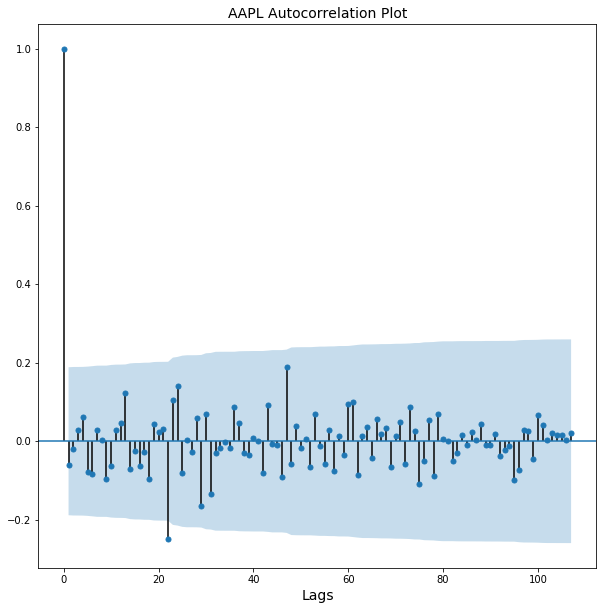

In [9]:
# sample autocorrelation plot
fig, ax = plt.subplots(figsize=(10,10))
tsaplots.plot_acf(df_returns['AAPL'].values, ax=ax, alpha=0.05)
plt.title("AAPL Autocorrelation Plot", fontsize=14)
plt.xlabel('Lags', fontsize=14)
plt.show()
plt.close()

## Hypothesis: Less than 10% of the stocks' returns show weak or little autocorrelation
## A stock's returns are weakly correlated if at least 5 lag points are significant
### Null: The proportion is 10% or greater
### Alternative: The proportion is less than 10%

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


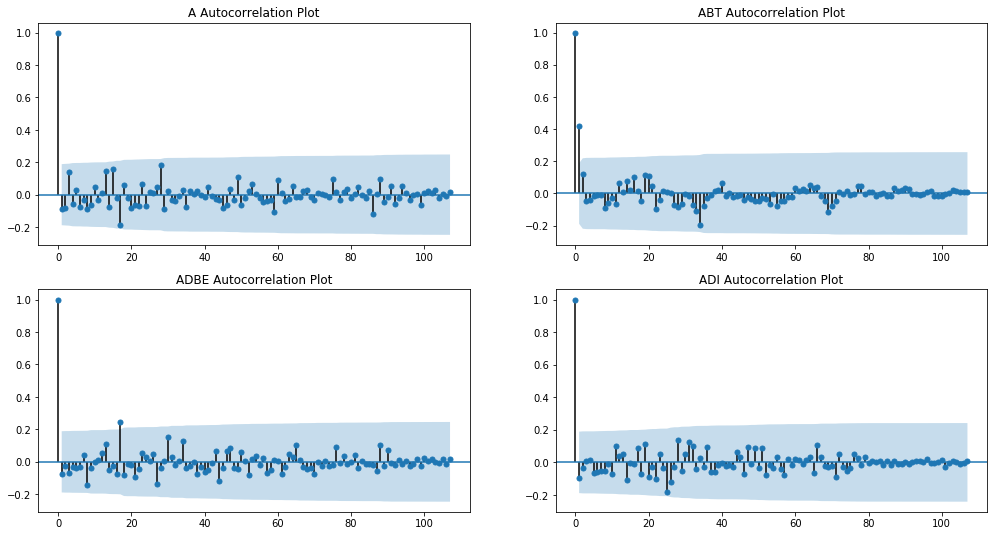

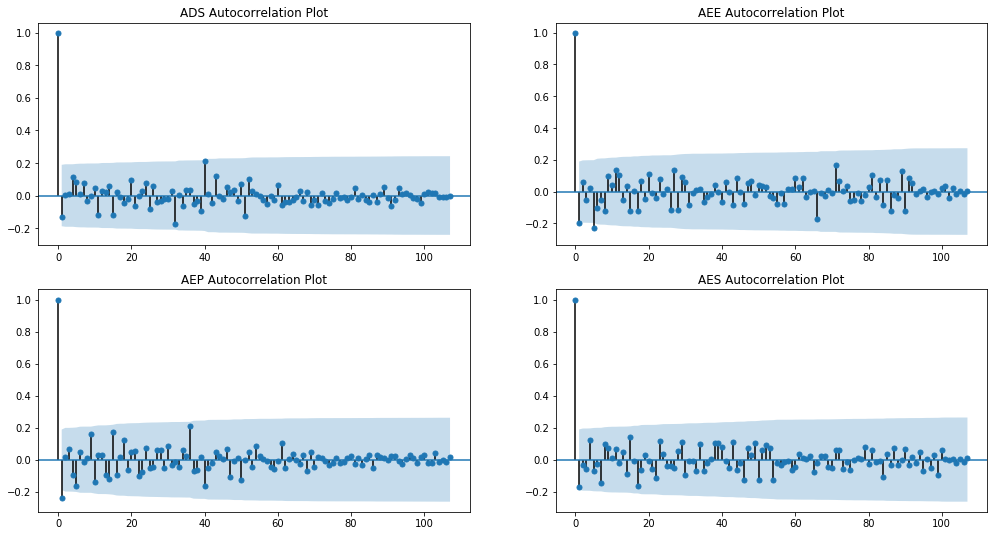

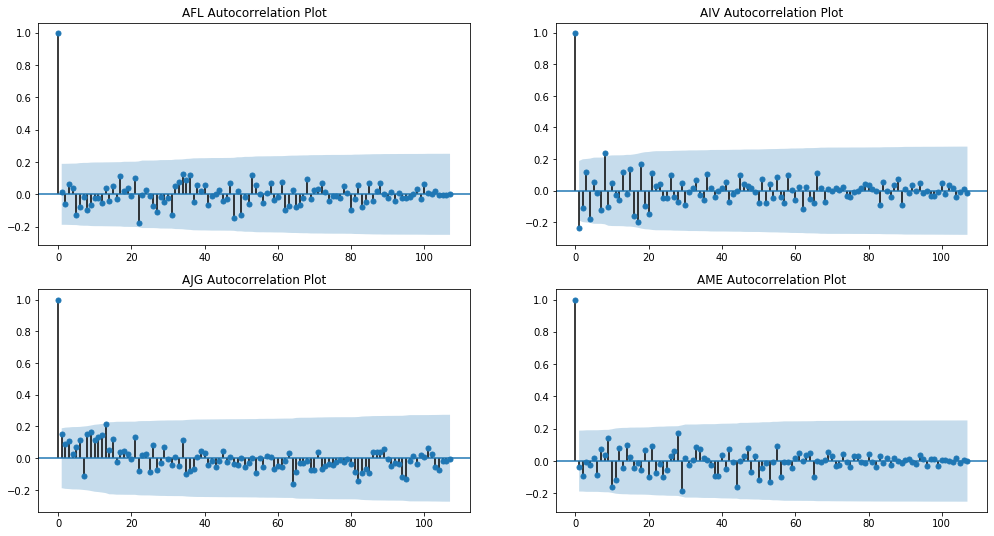

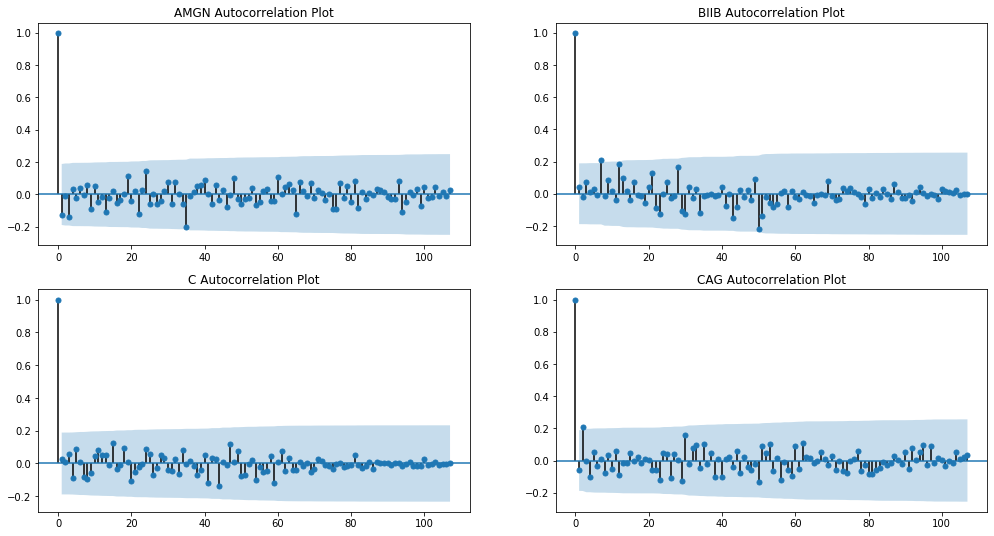

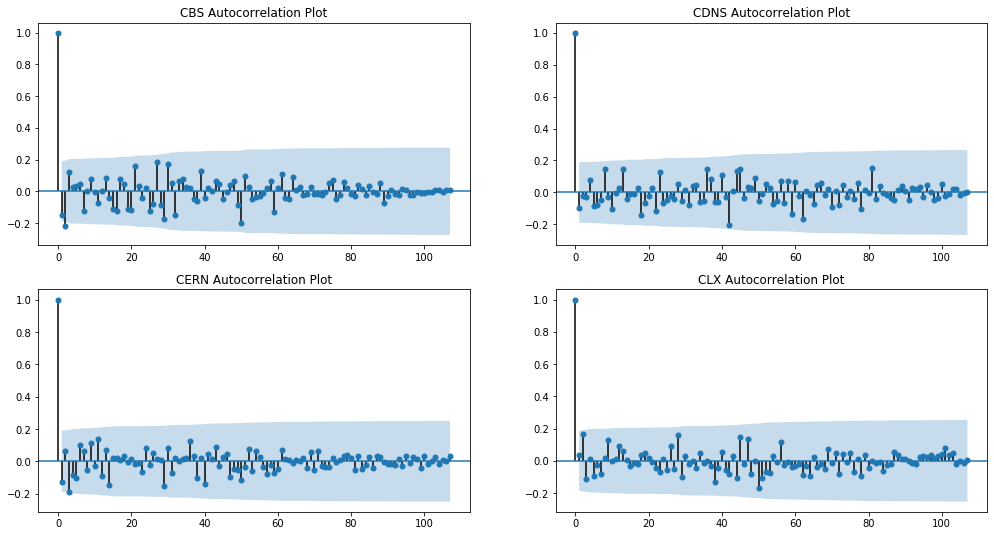

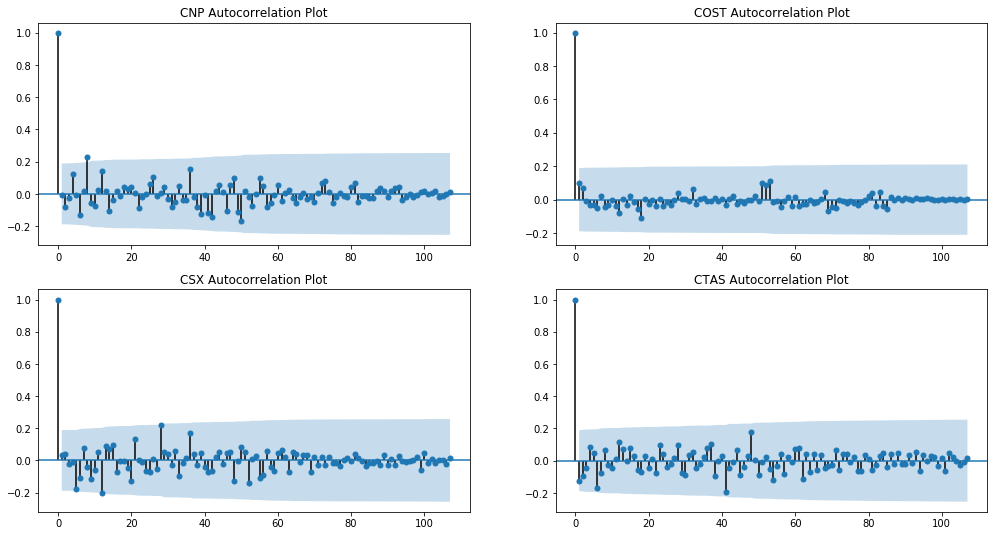

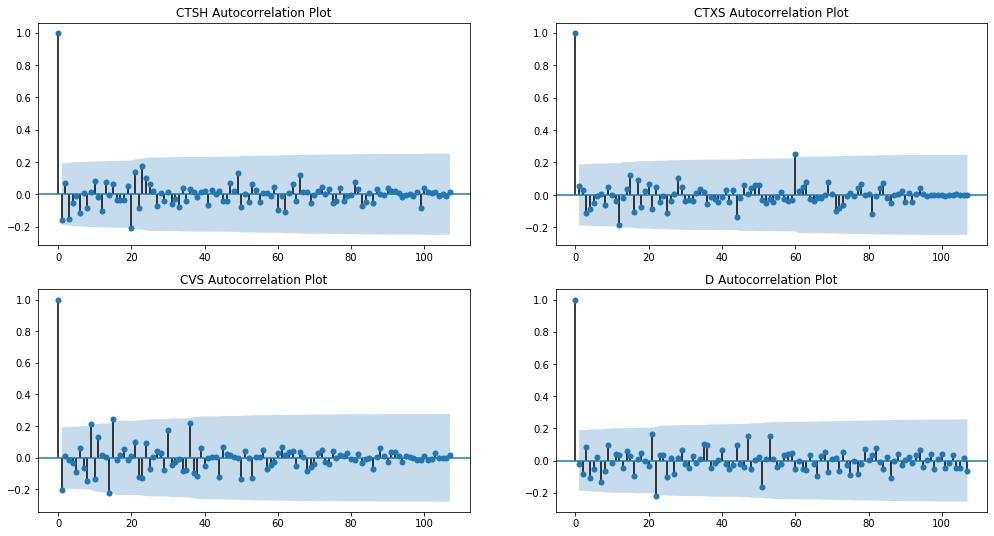

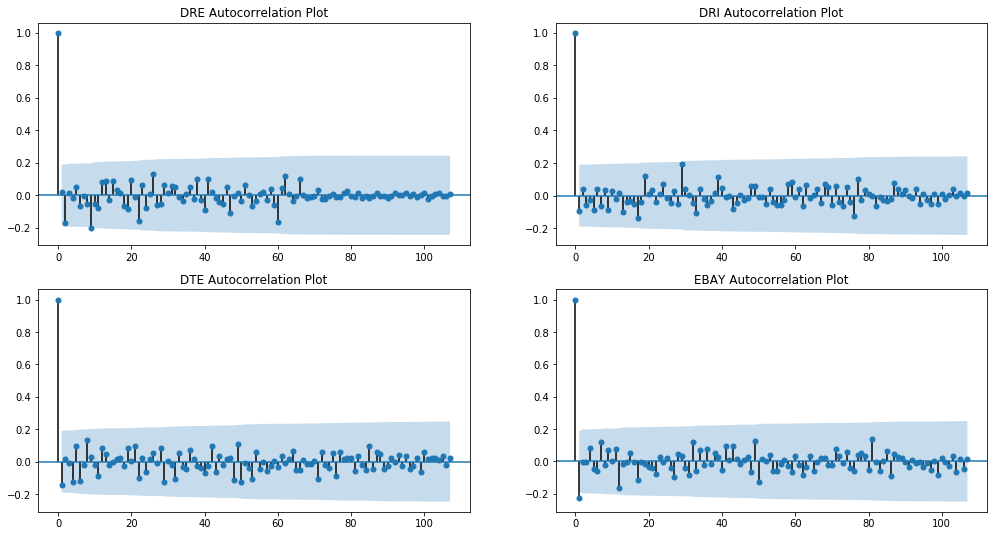

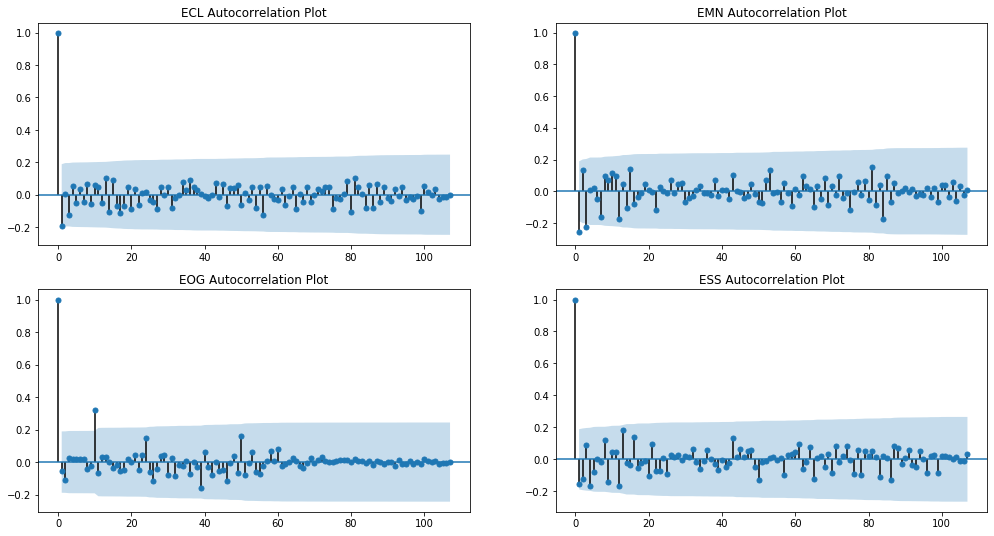

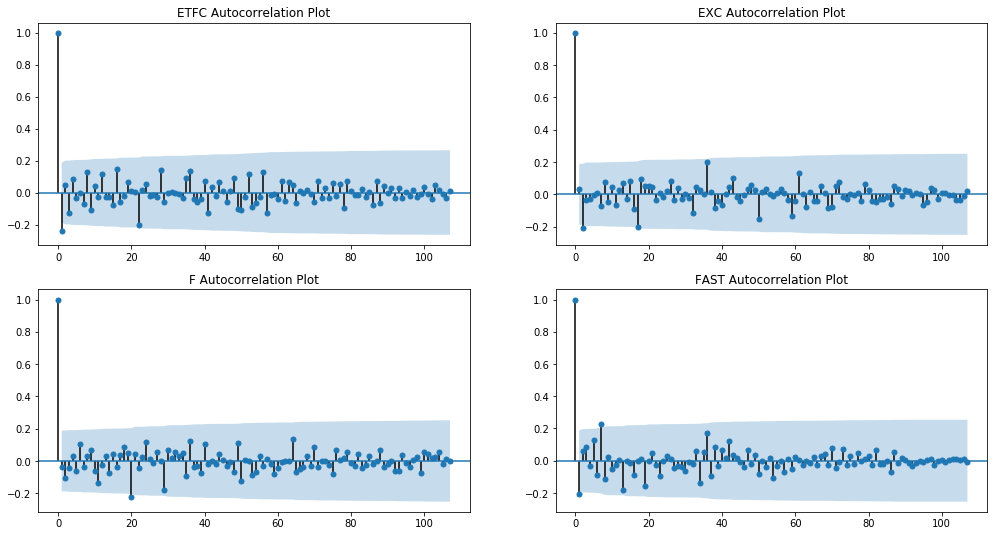

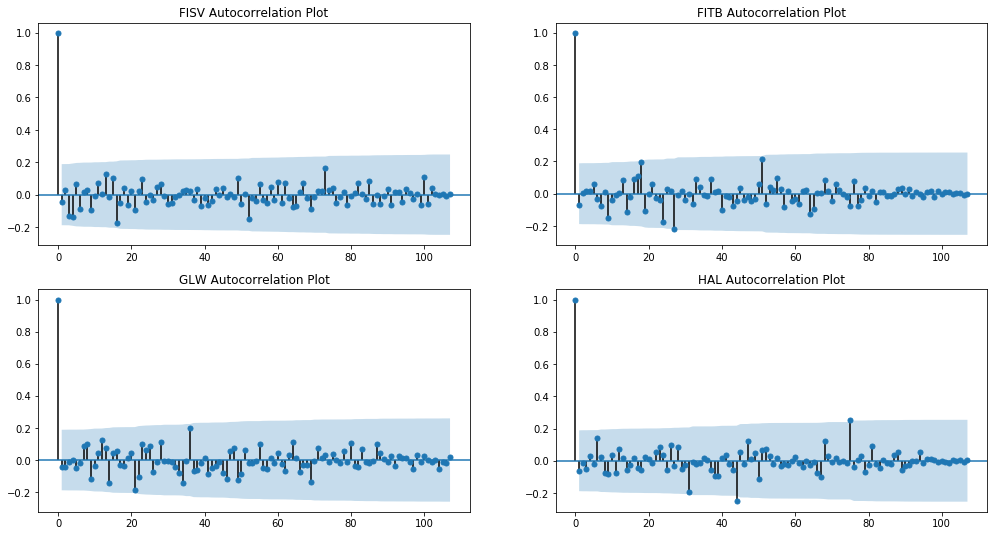

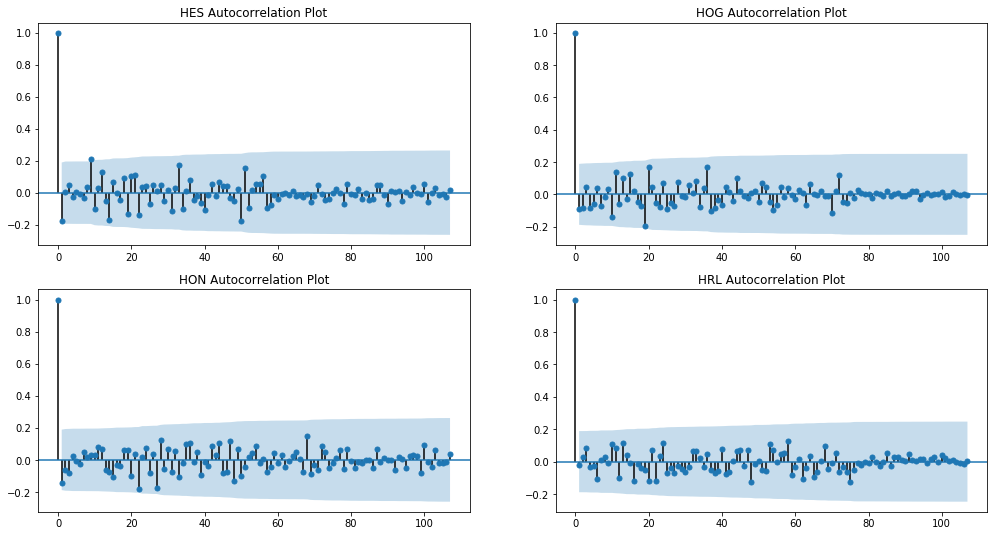

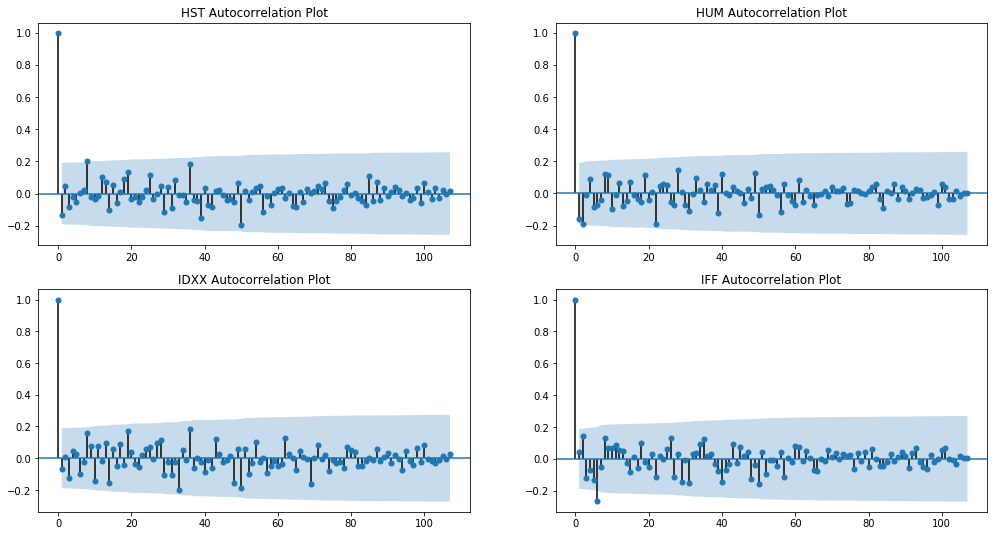

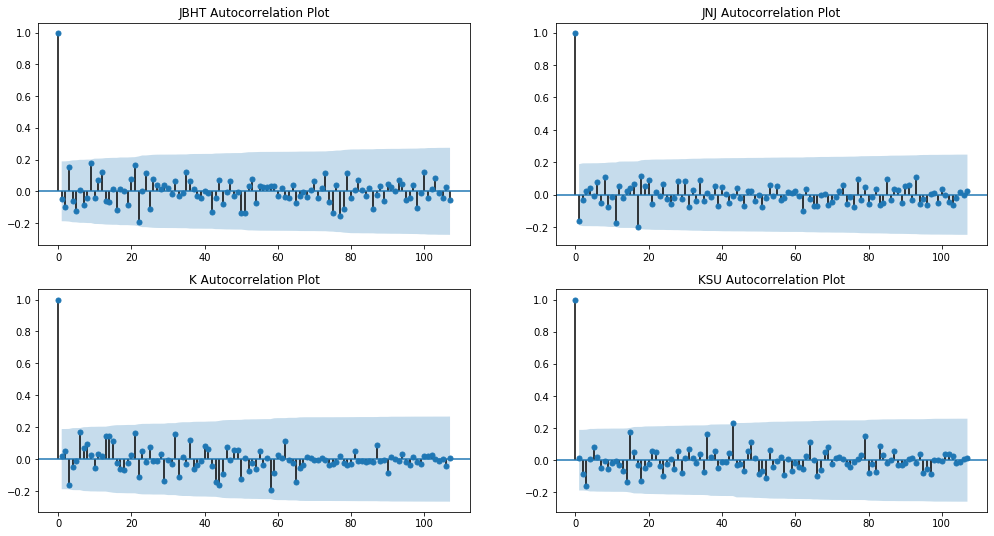

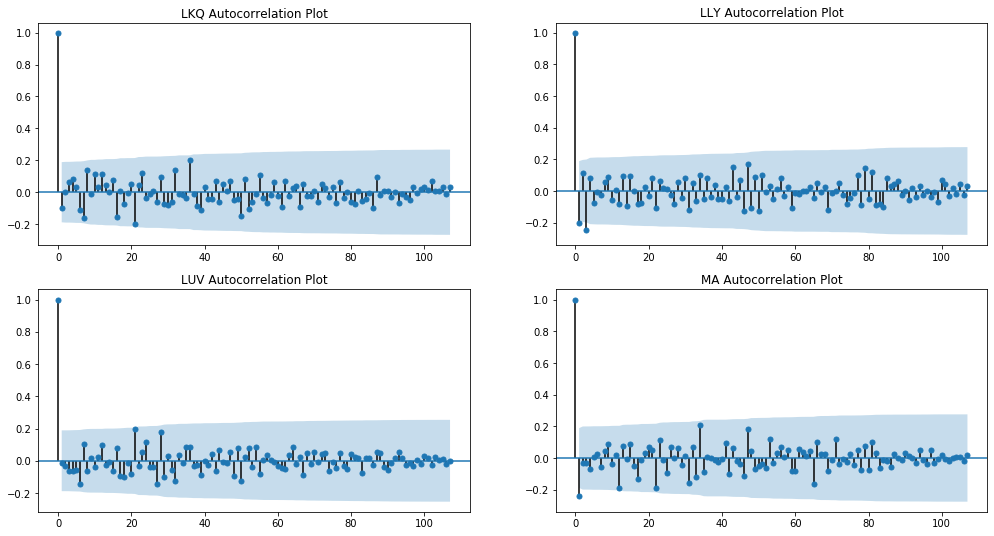

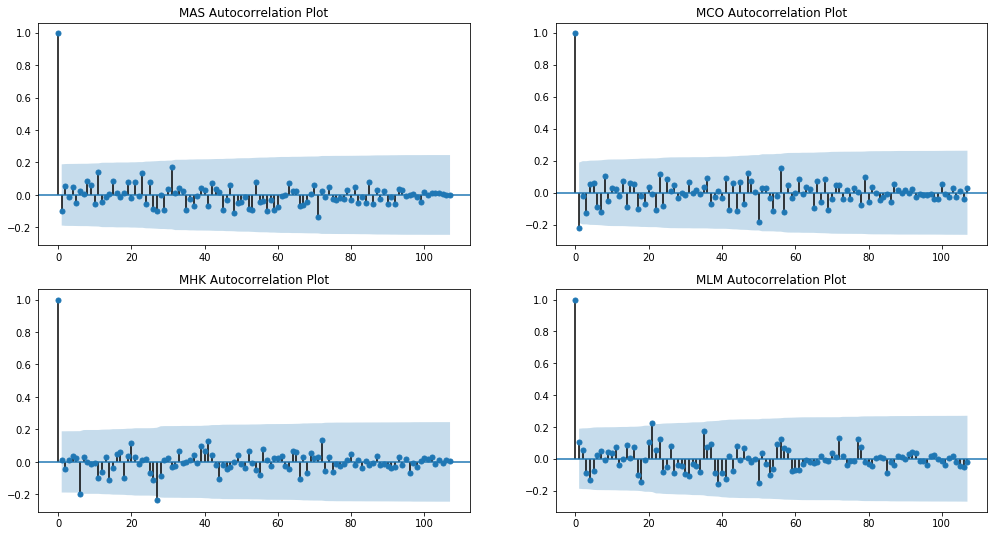

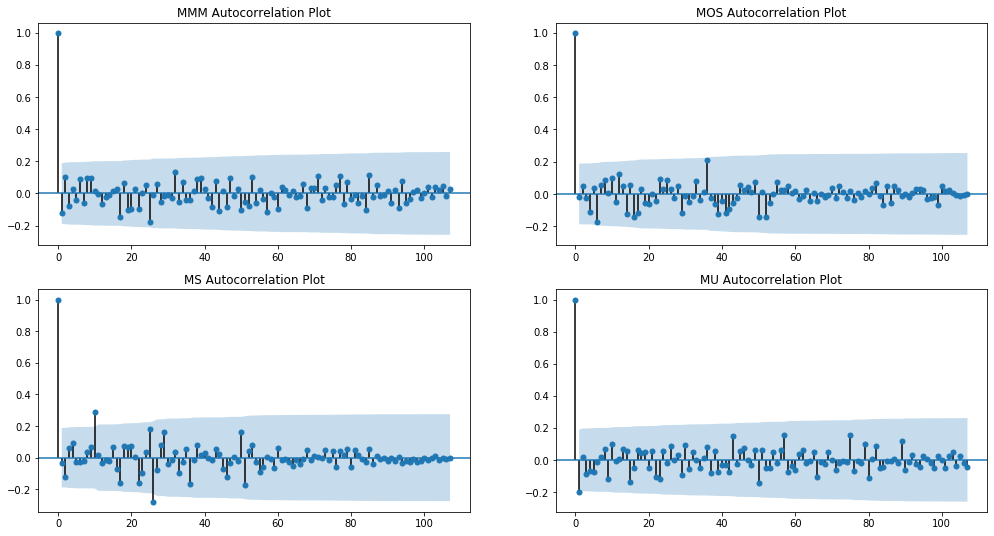

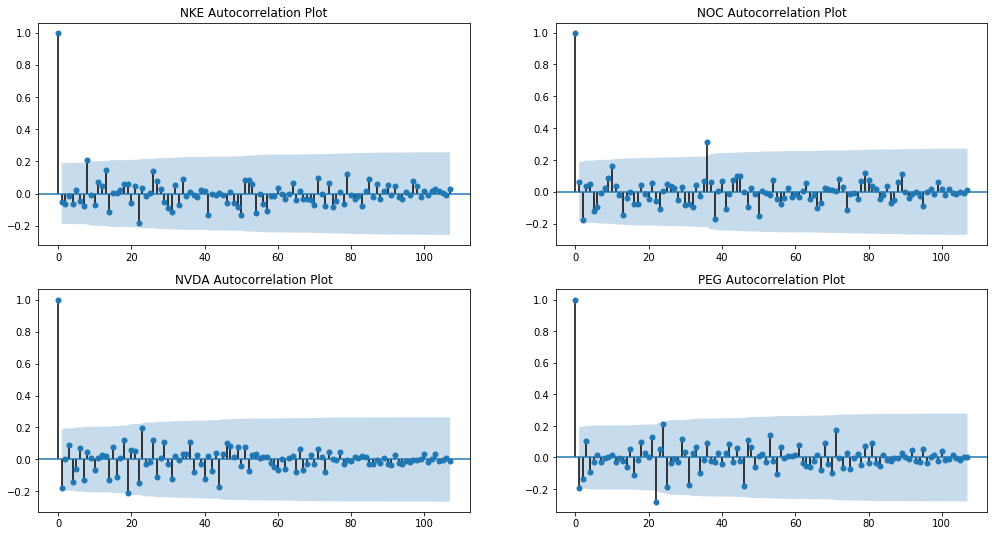

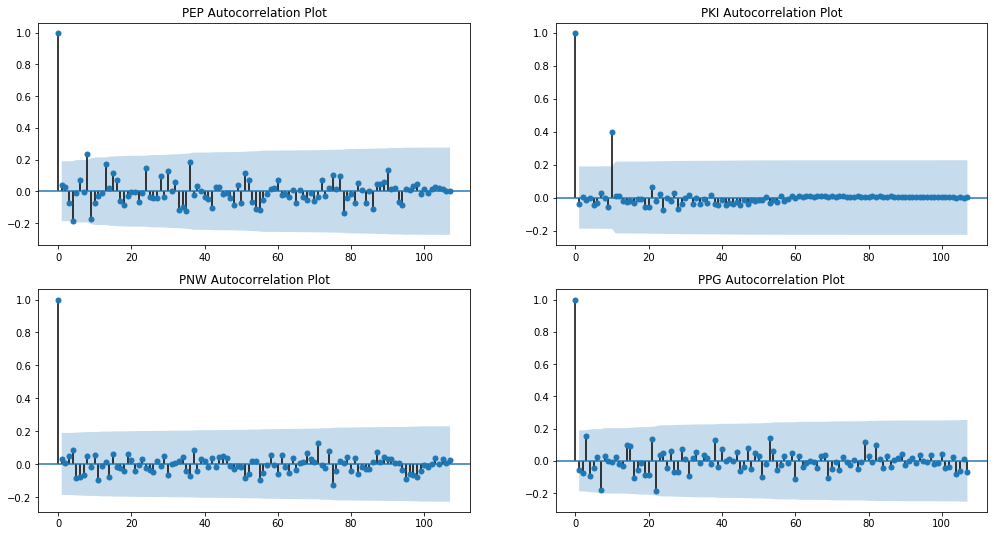

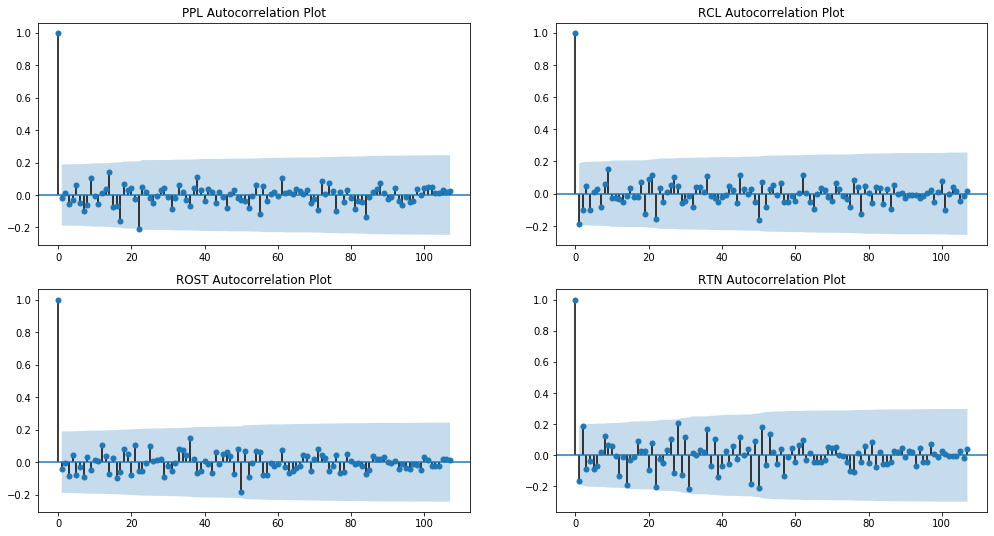

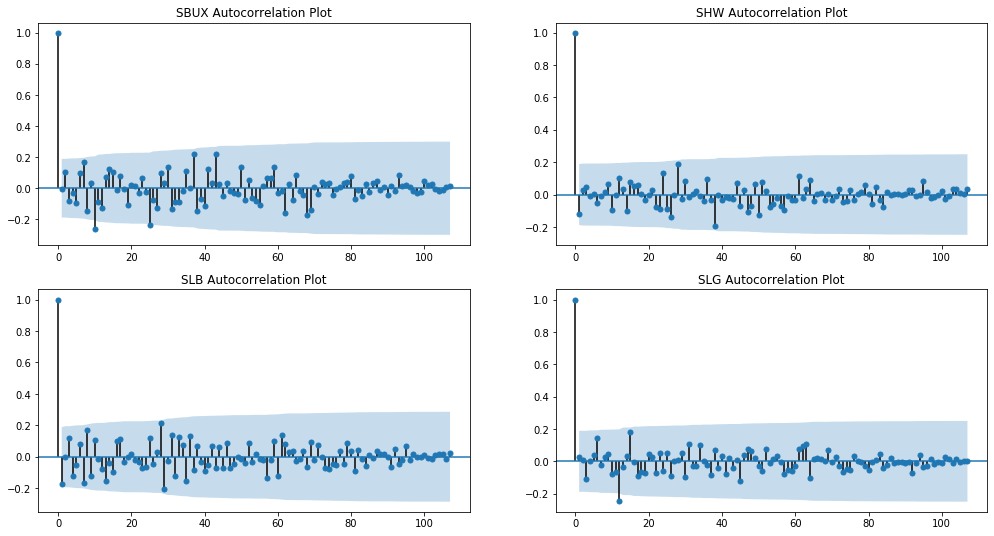

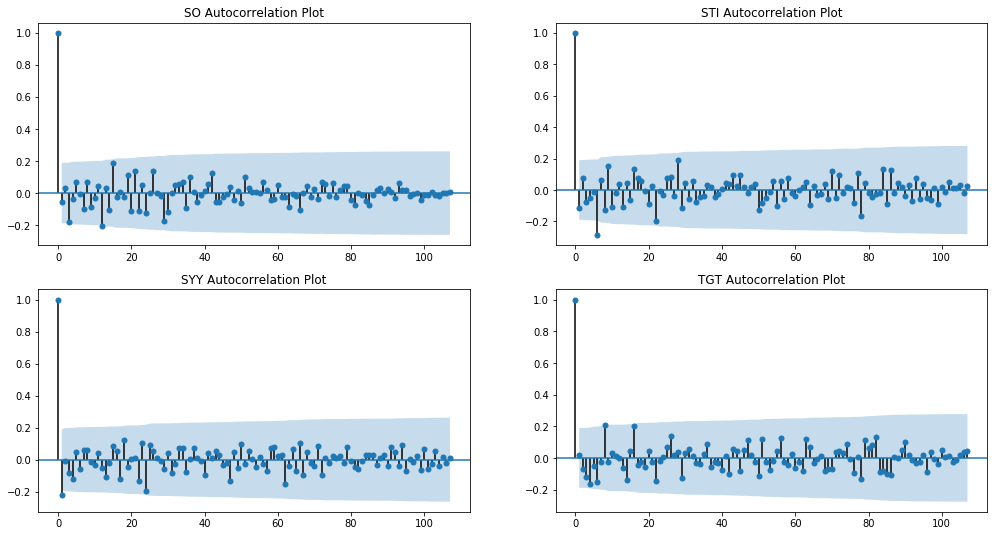

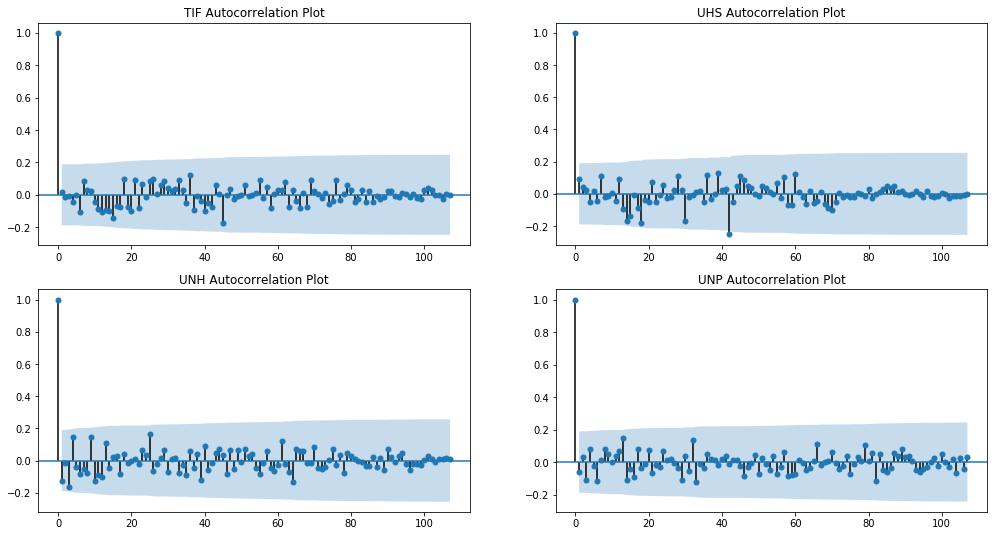

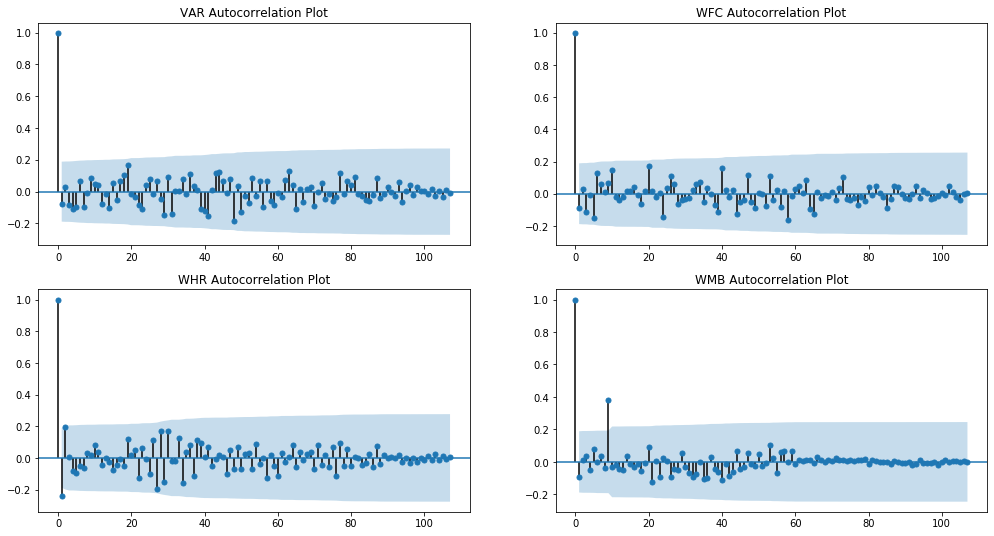

In [10]:
# 1 stock showed weak autocorrelation ['CVS']

auto_test = df_returns.sample(n=100, random_state = 1, axis=1)
auto_test.sort_index(axis=1, inplace=True)

n_stocks = len(auto_test.columns)
n_cols = 2
n_rows = 2
n_plots = n_rows*n_cols
n_loops = int(np.floor(n_stocks/n_plots))
temp_matrix = np.array(range(n_plots)).reshape(n_rows, n_cols)

for i in range(n_loops):
    lower=i*n_plots
    upper = (i+1)*n_plots
    
    temp_list = auto_test.columns[lower:upper]
    fig, ax = plt.subplots(n_rows, n_cols, figsize = (17, 9))
    
    for k in range(n_rows):
        for l in range(n_cols):
            temp_idx = temp_matrix[k,l]
            symbol = temp_list[temp_idx]
            
            tsaplots.plot_acf(df_returns[symbol].values, ax=ax[k,l], alpha=0.05, 
                              title = "{} Autocorrelation Plot".format(symbol))
plt.close()

### one-sided z-test on proportion, alpha = 0.05

In [11]:
count = 1
trials = 100
p= 0.1

proportions_ztest(count, trials, p, alternative = 'smaller')

(-9.04534033733291, 7.459983198493377e-20)

### Reject the null hypothesis. The proportion of returns with weak autocorrelation is less than 10%

--------------------------------------

# Check for Normality of returns (roughly)

## Hypothesis: Less than 10% of the stocks' returns deviate from the normal distribution i.e. more than 90% of the returns demonstrate at least weak normality

### Null Hypothesis: 10% or greater of the stocks' returns are non-normal
### Alternative: Less than 10% of the stock's returns are non-normal

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


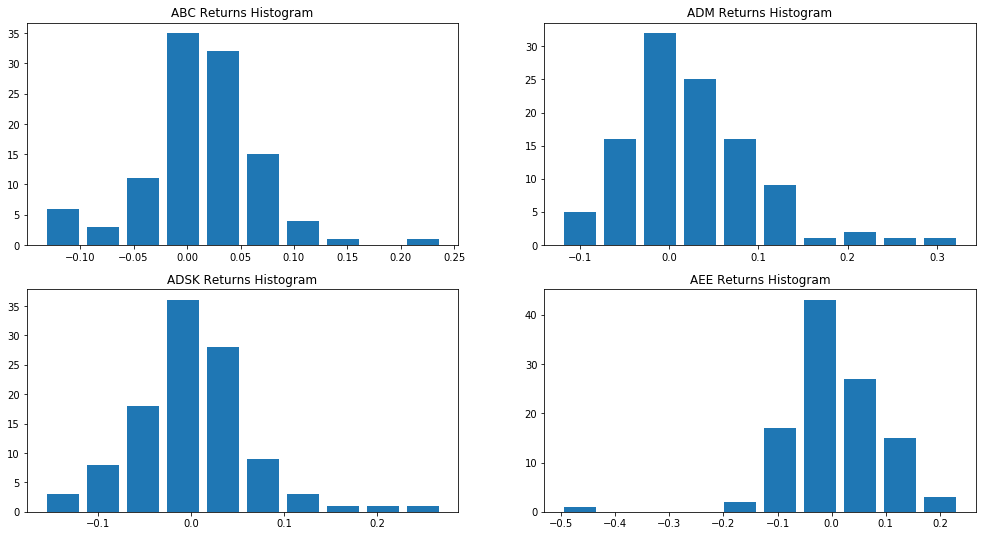

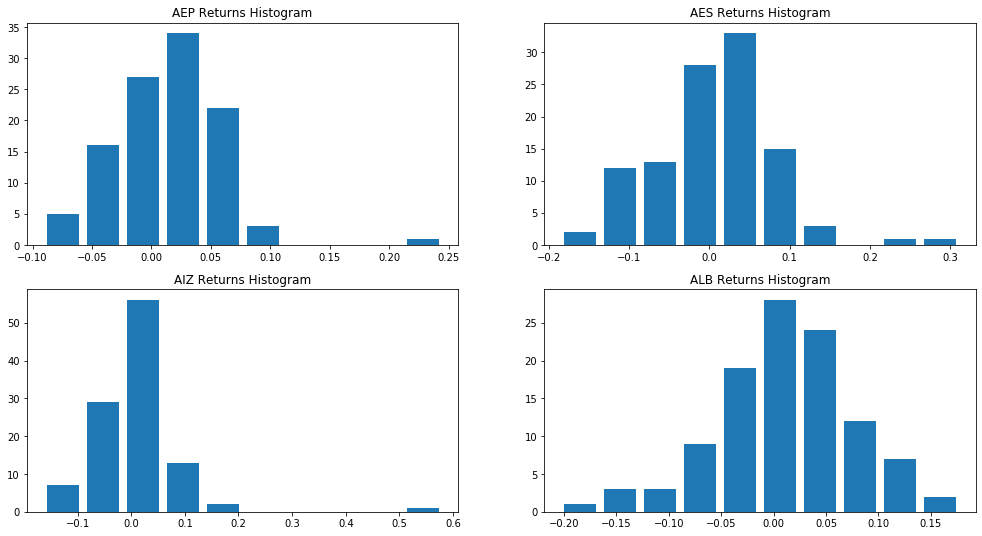

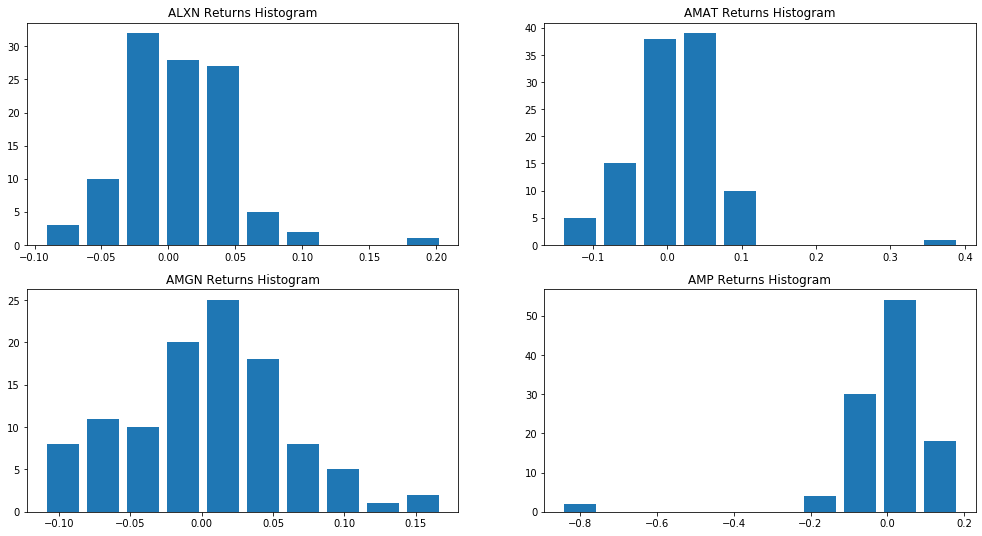

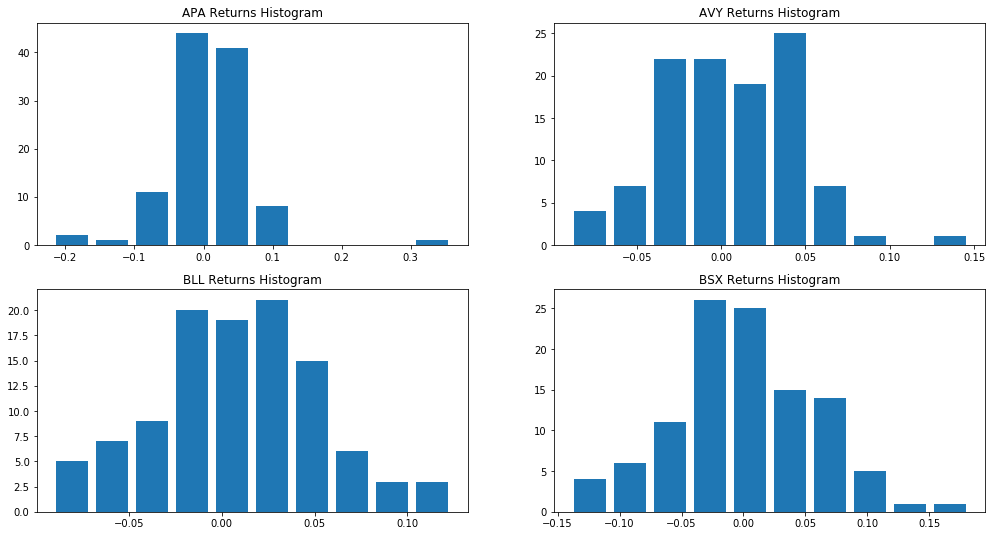

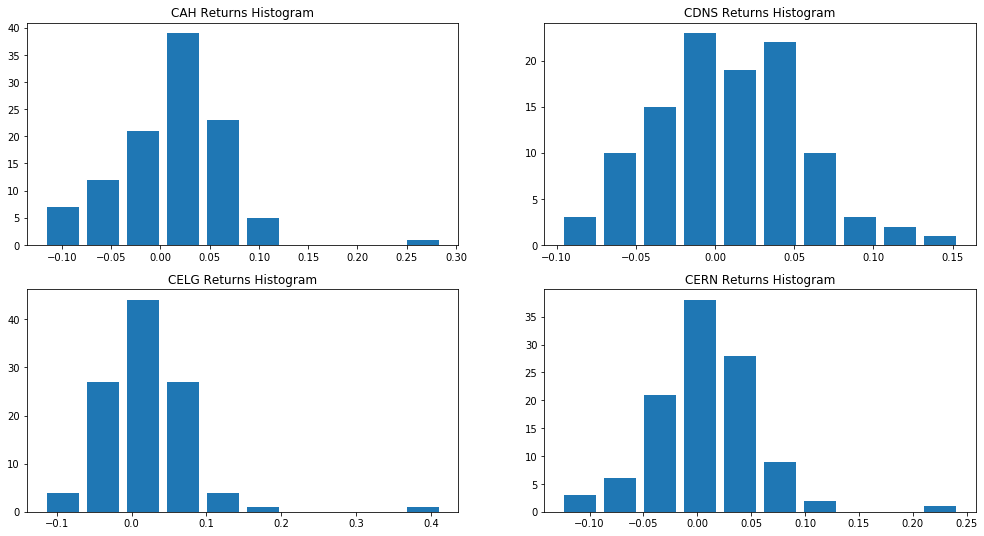

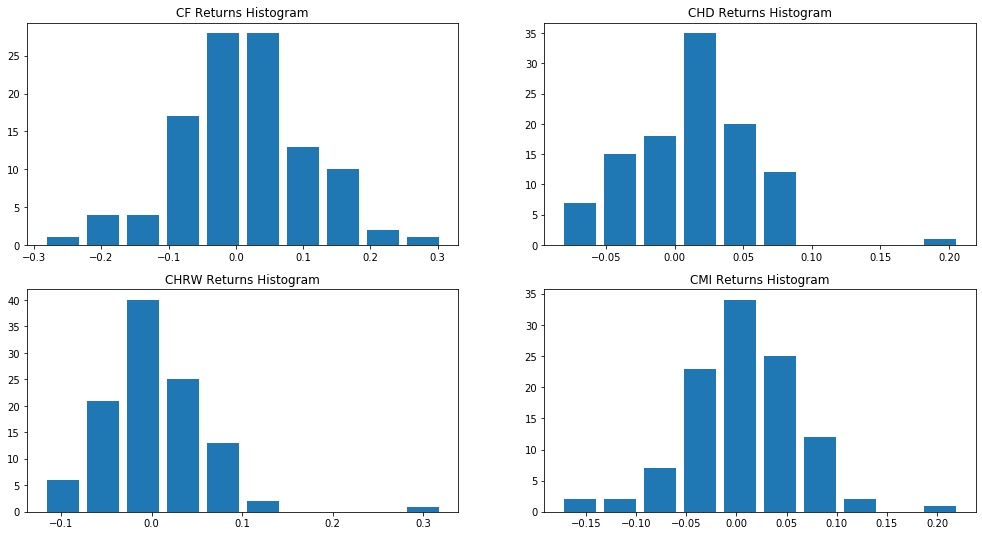

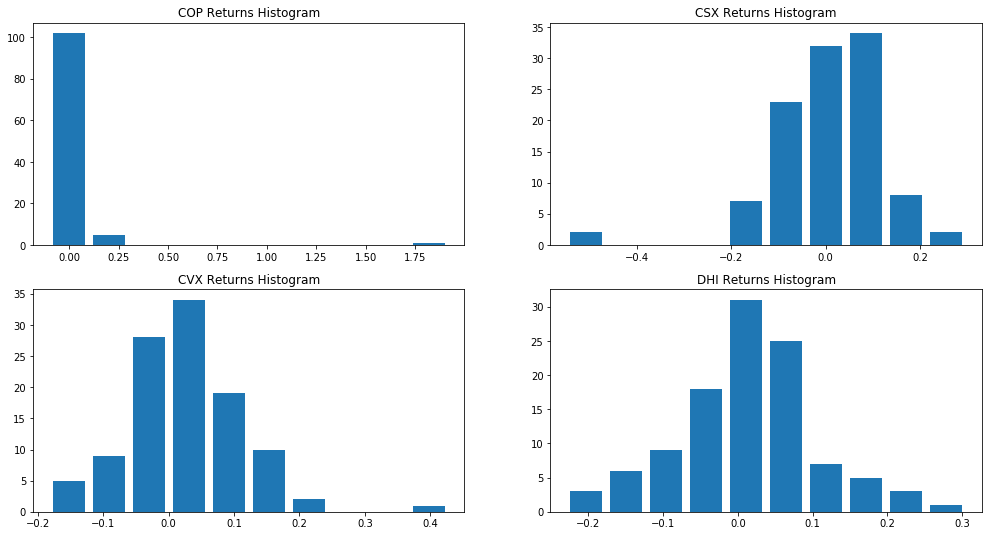

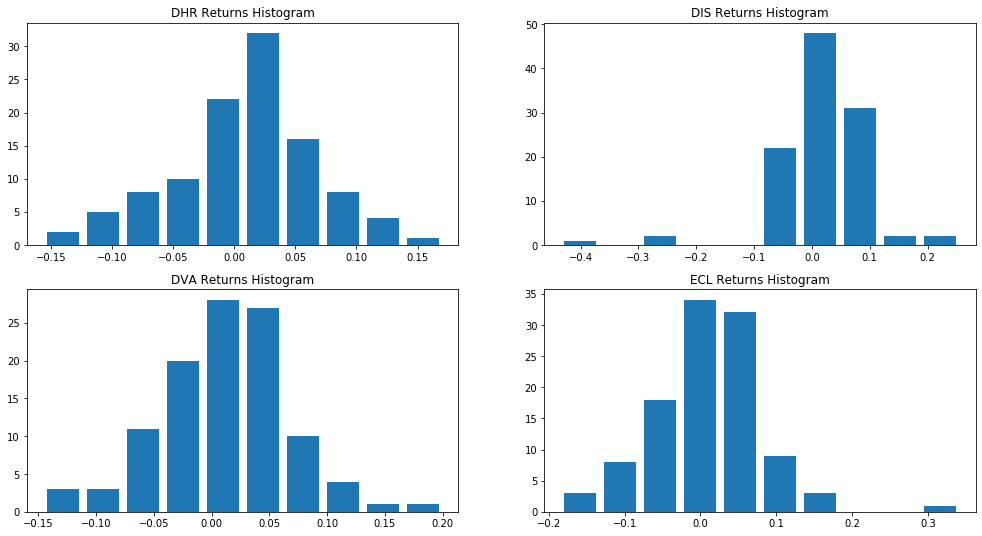

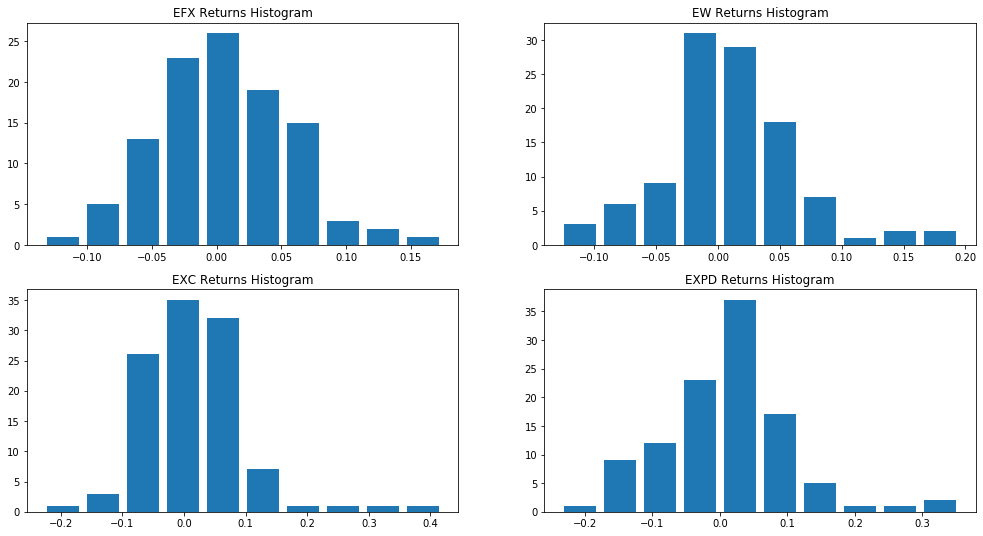

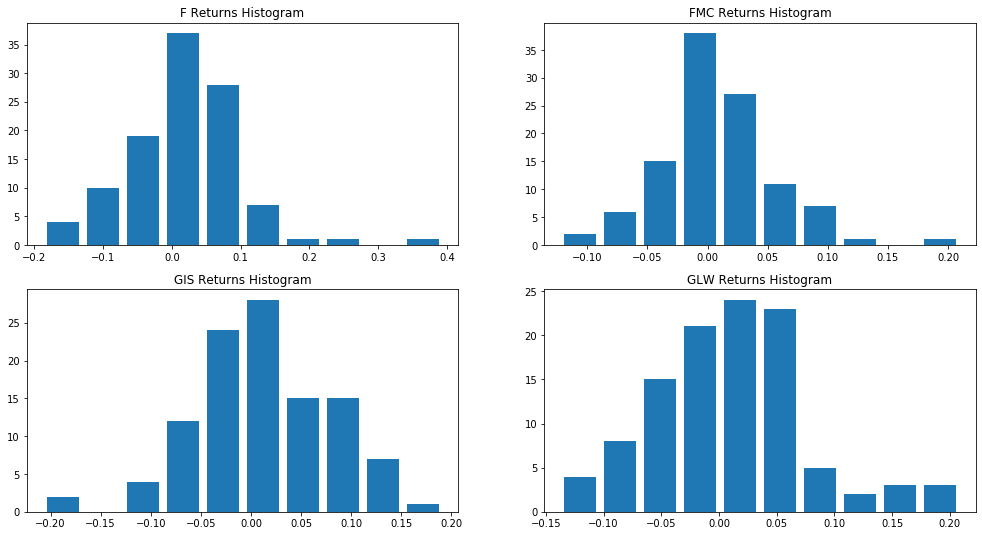

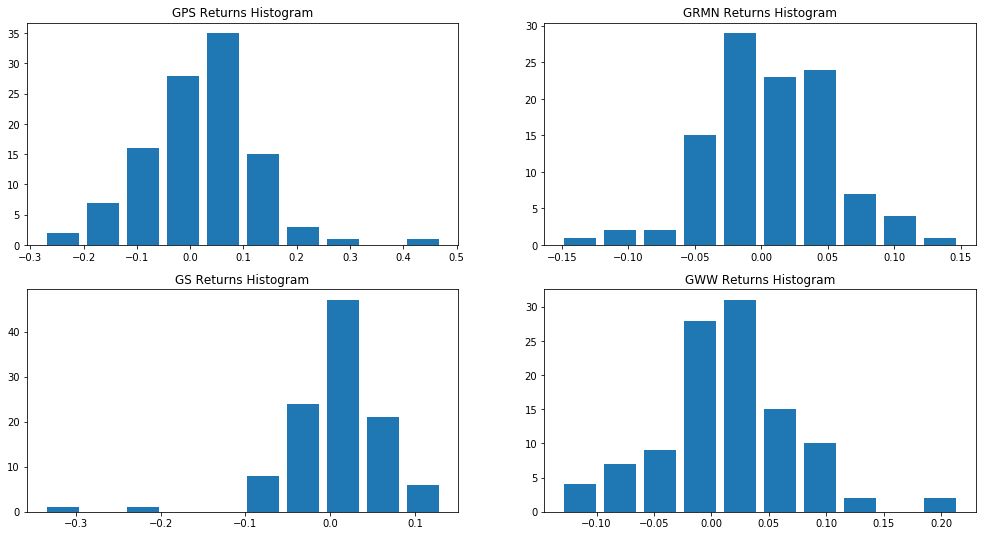

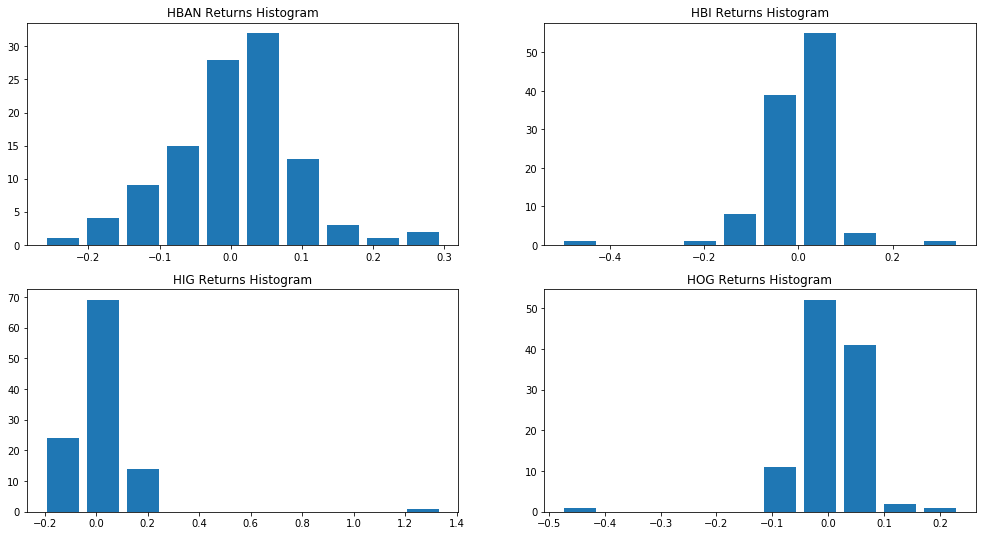

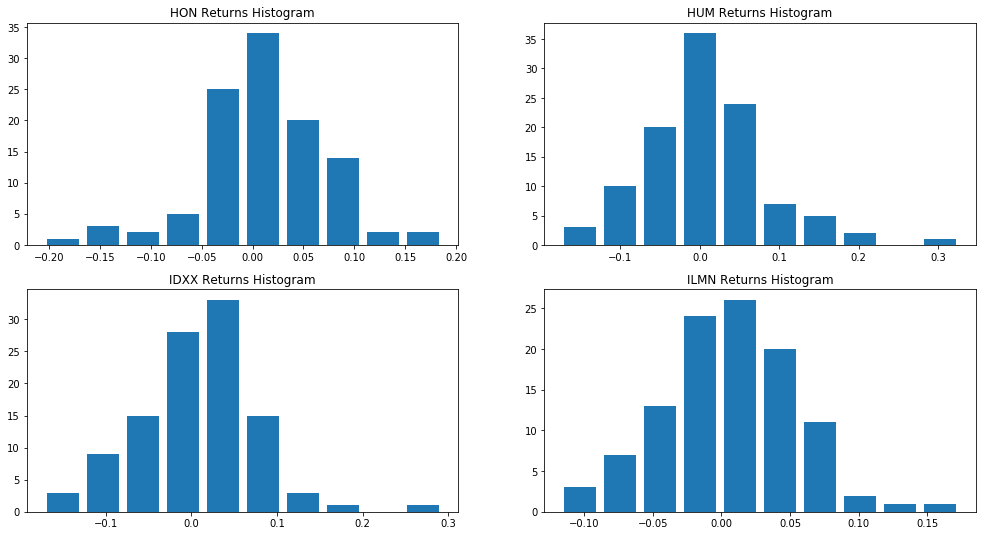

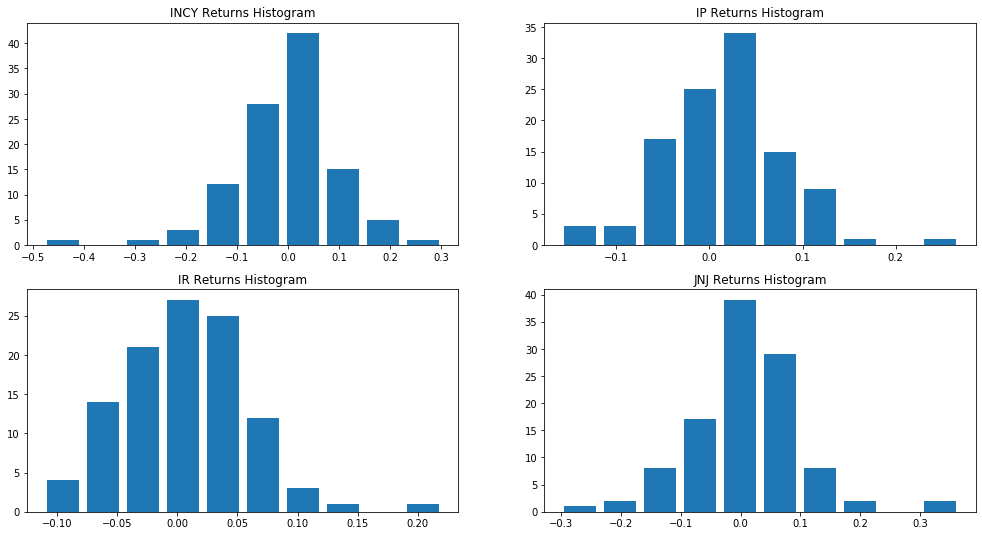

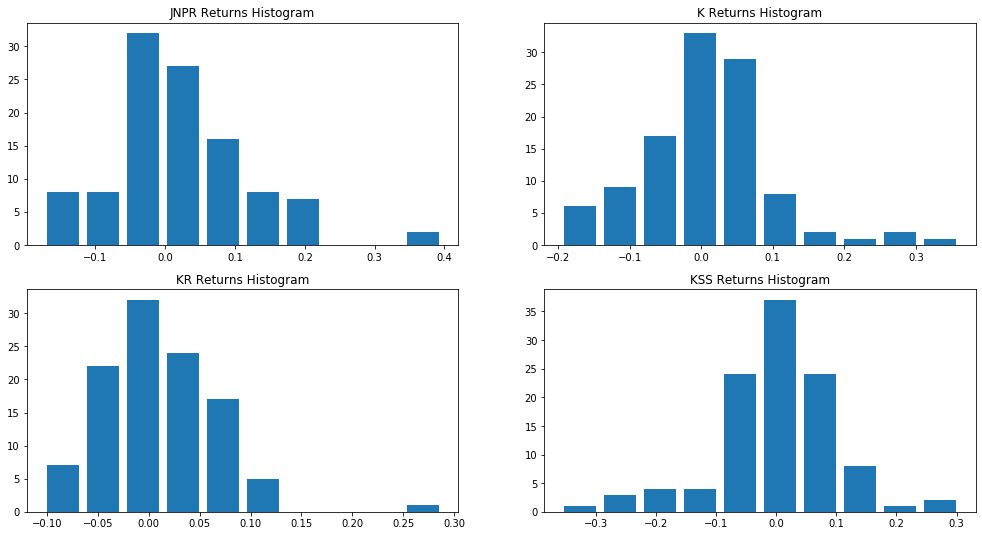

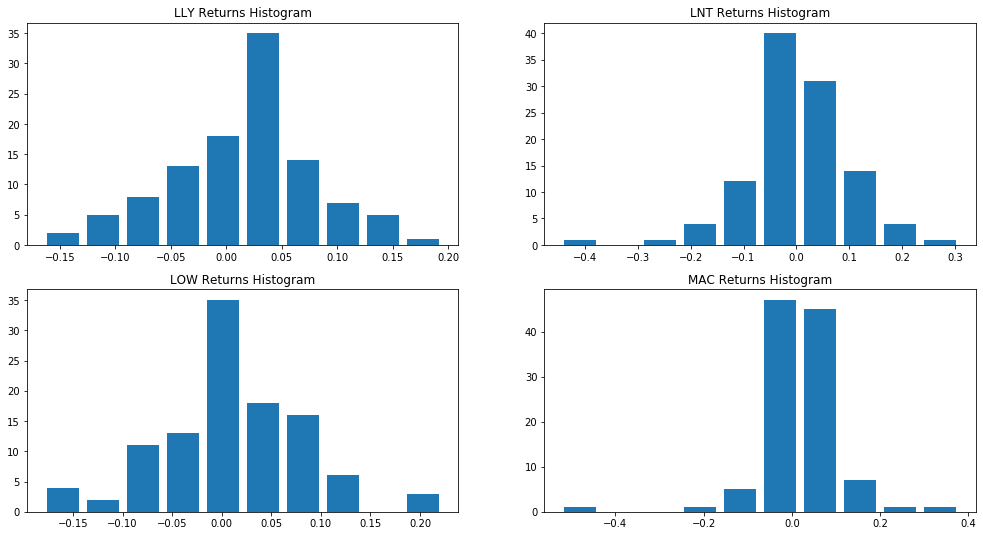

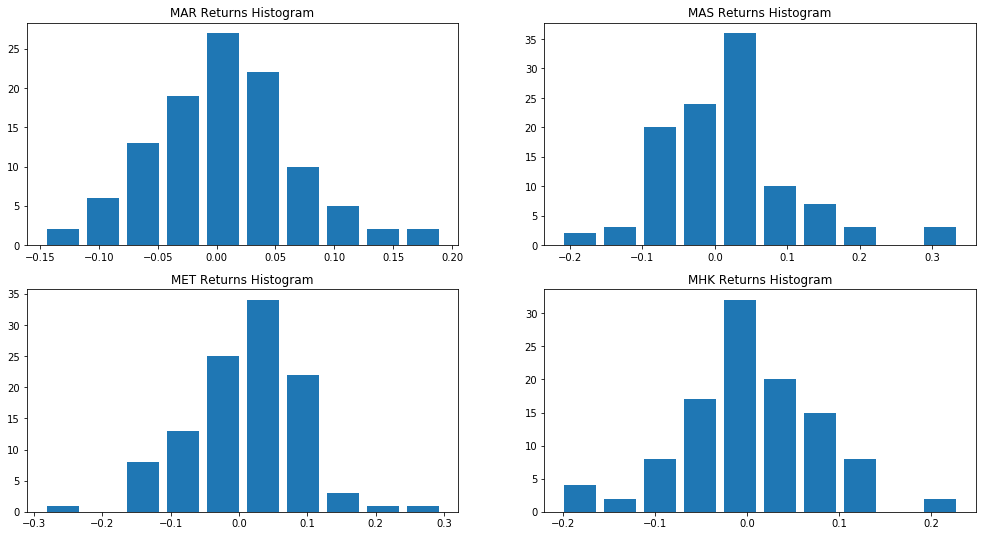

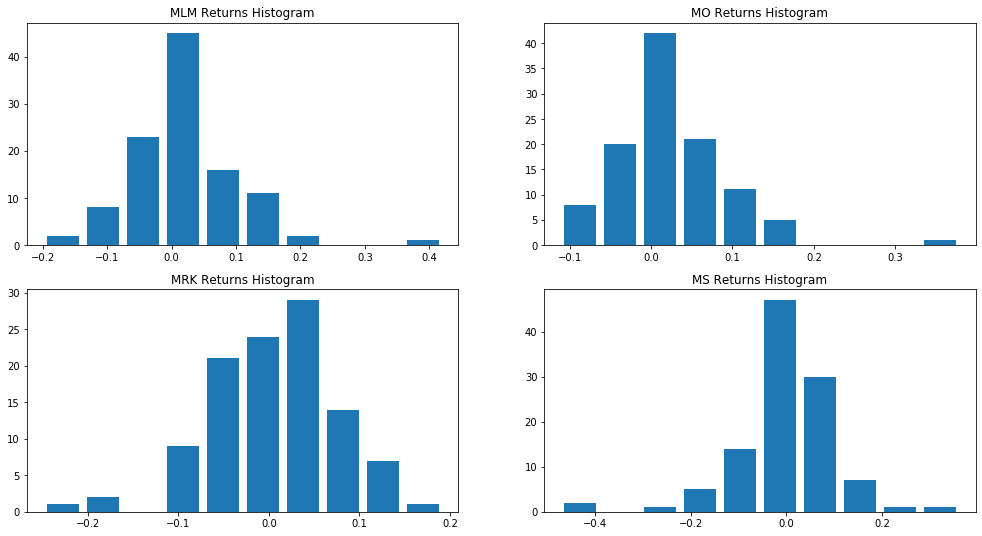

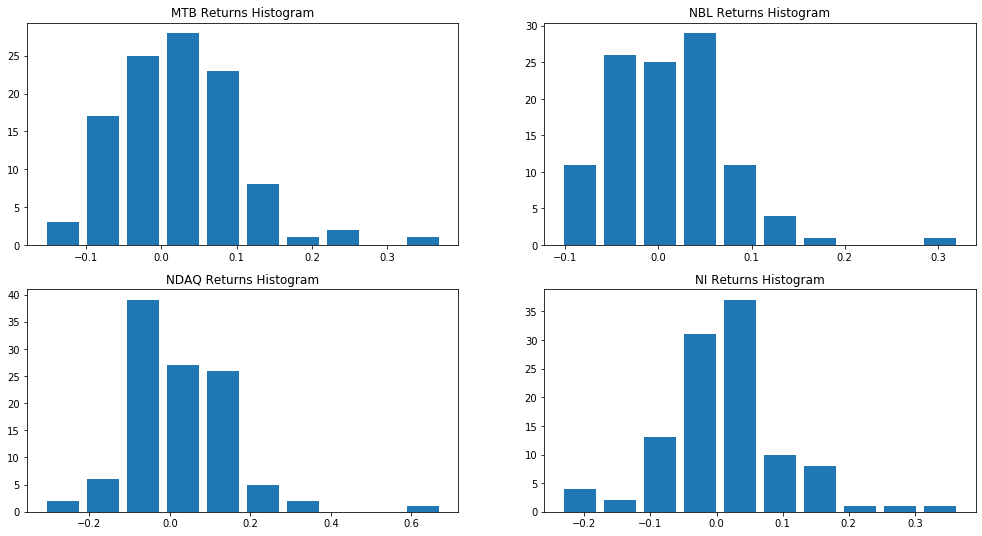

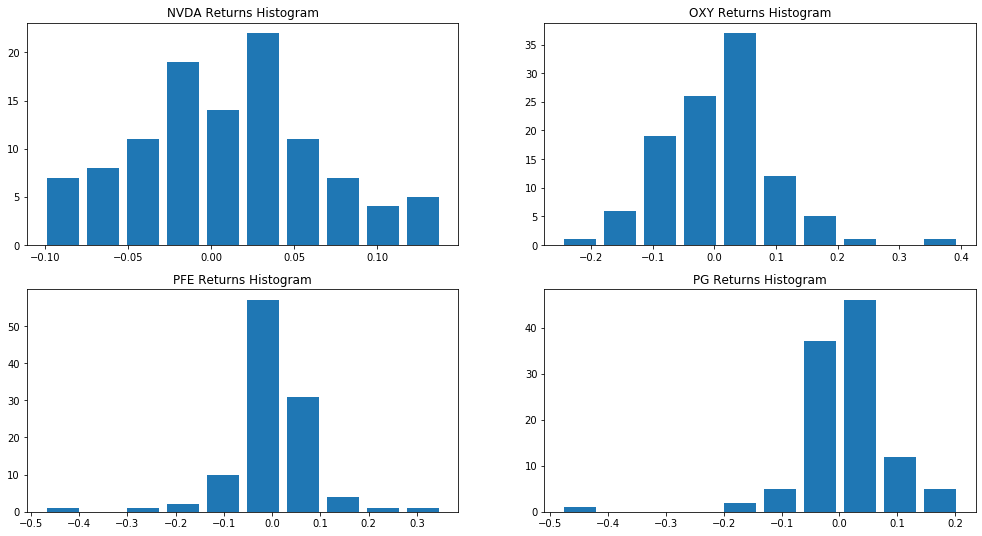

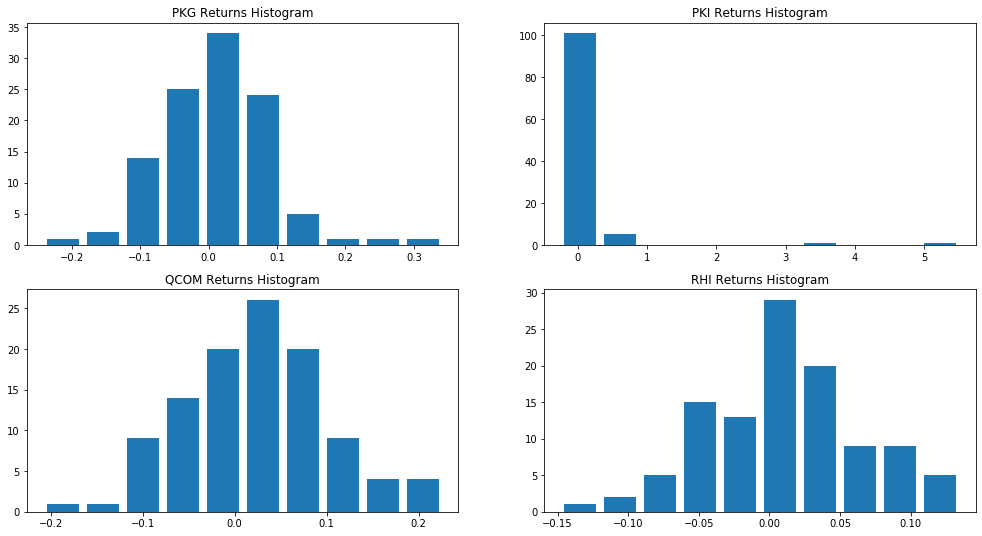

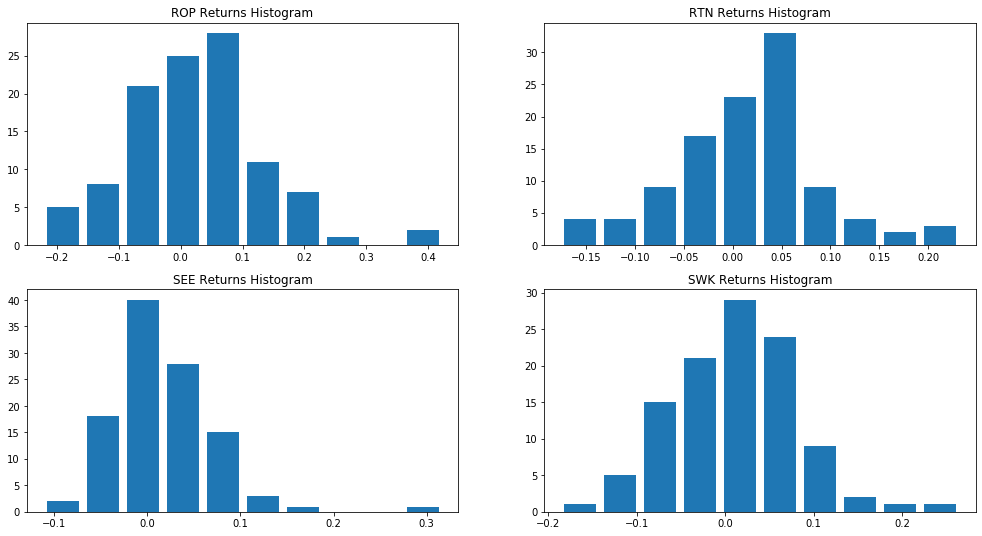

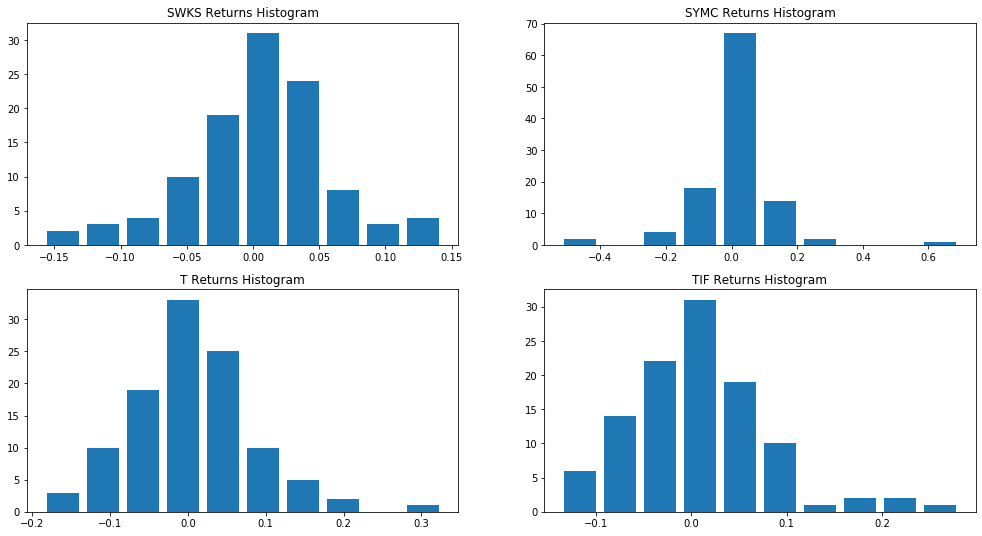

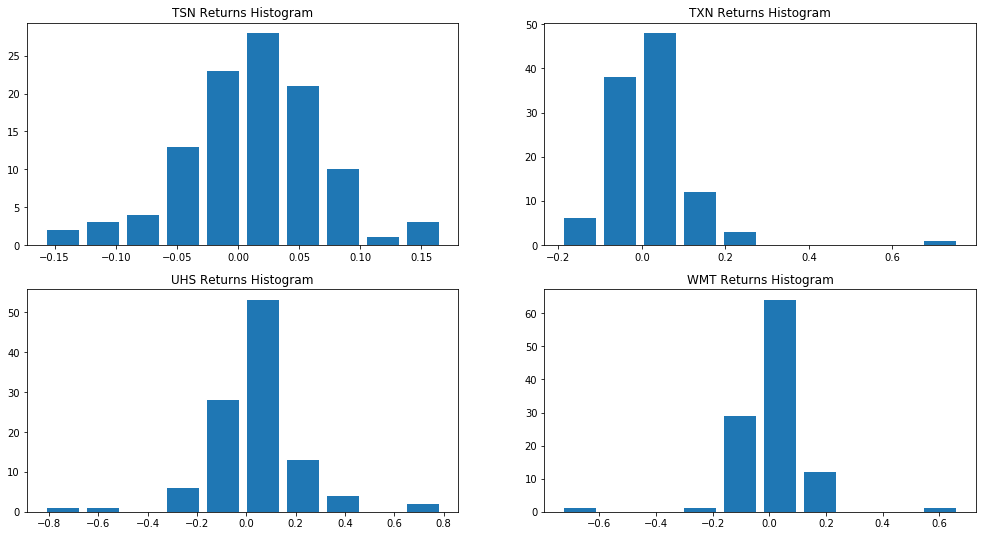

In [12]:
norm_test = df_returns.sample(n=100, random_state = 2, axis=1)
norm_test.sort_index(axis=1, inplace=True)

for i in range(n_loops):
    lower=i*n_plots
    upper = (i+1)*n_plots
    
    temp_list = norm_test.columns[lower:upper]
    fig, ax = plt.subplots(n_rows, n_cols, figsize = (17, 9))
    

    temp_idx = temp_matrix[k,l]
    symbol = temp_list[temp_idx]
            
    for k in range(n_rows):
        for l in range(n_cols):
            temp_idx = temp_matrix[k,l]
            symbol = temp_list[temp_idx]
            
            ax[k,l].hist(x=df_returns[symbol].values, rwidth=0.8)
            ax[k,l].set_title("{} Returns Histogram".format(symbol))
            
plt.close()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app


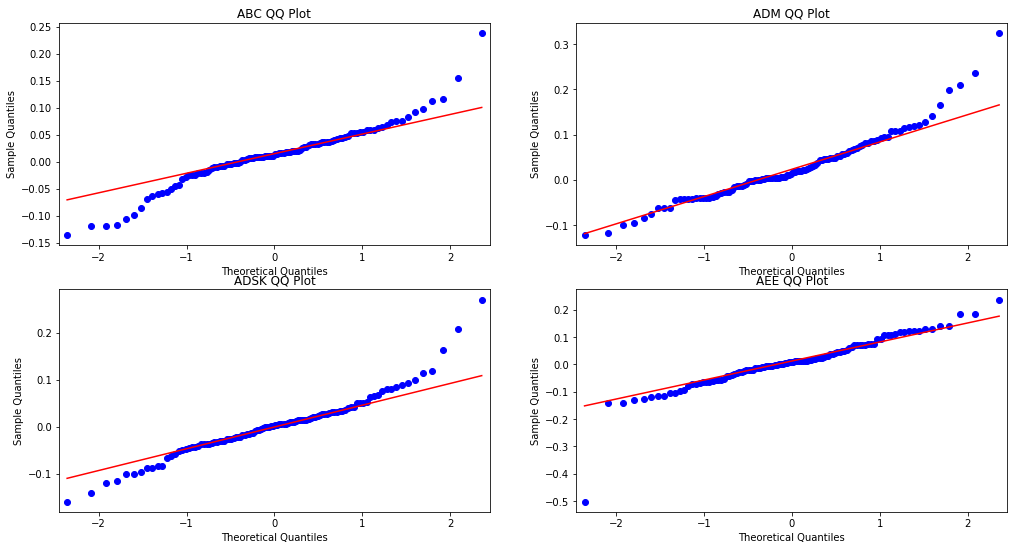

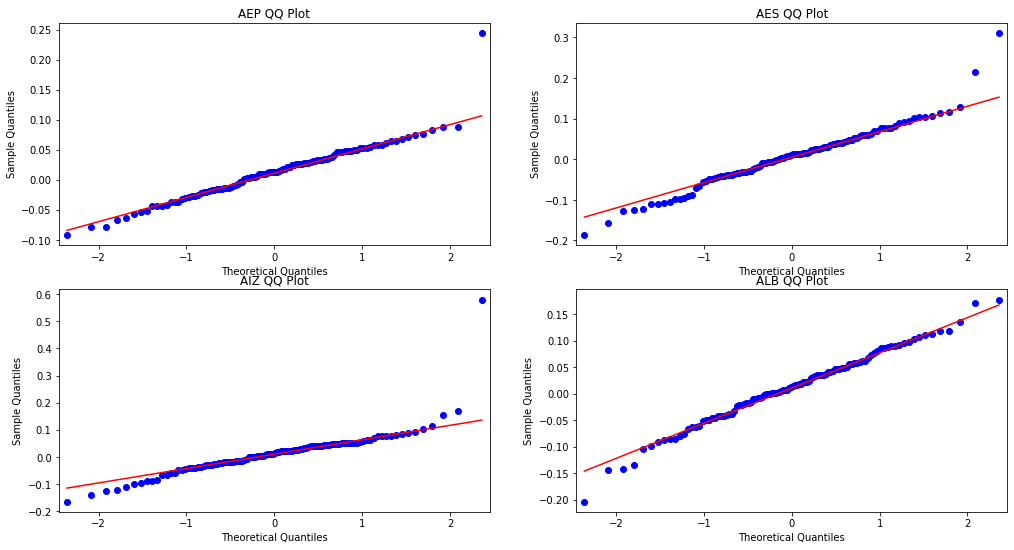

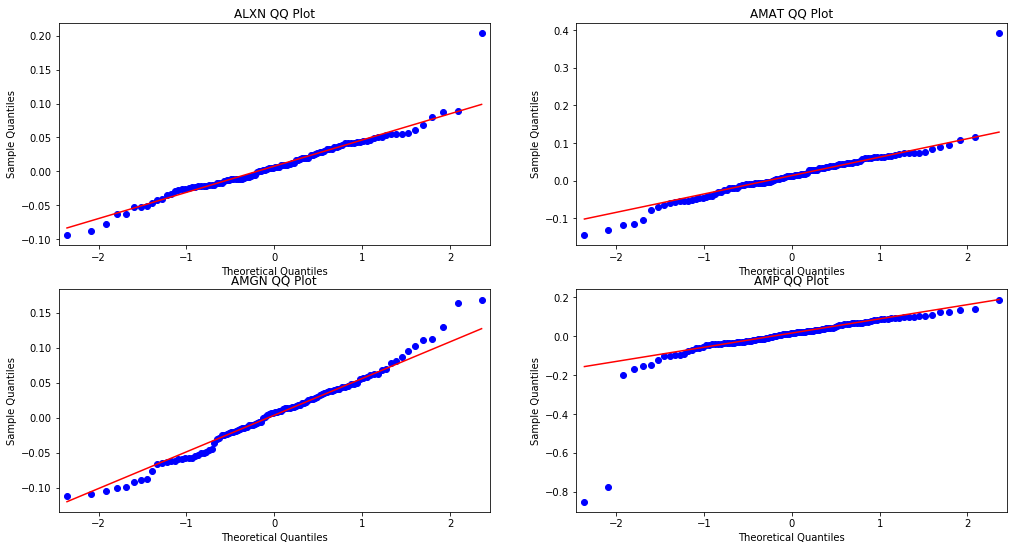

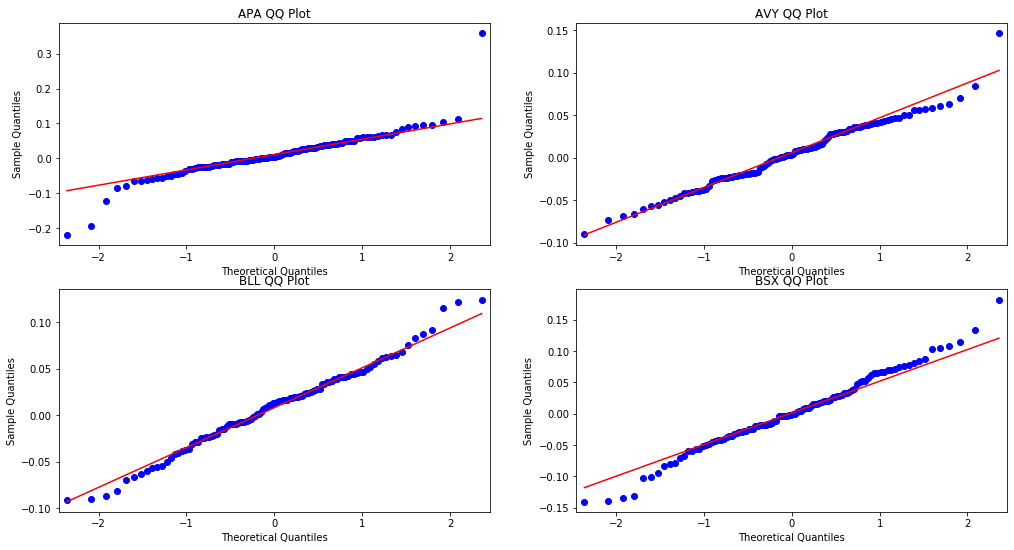

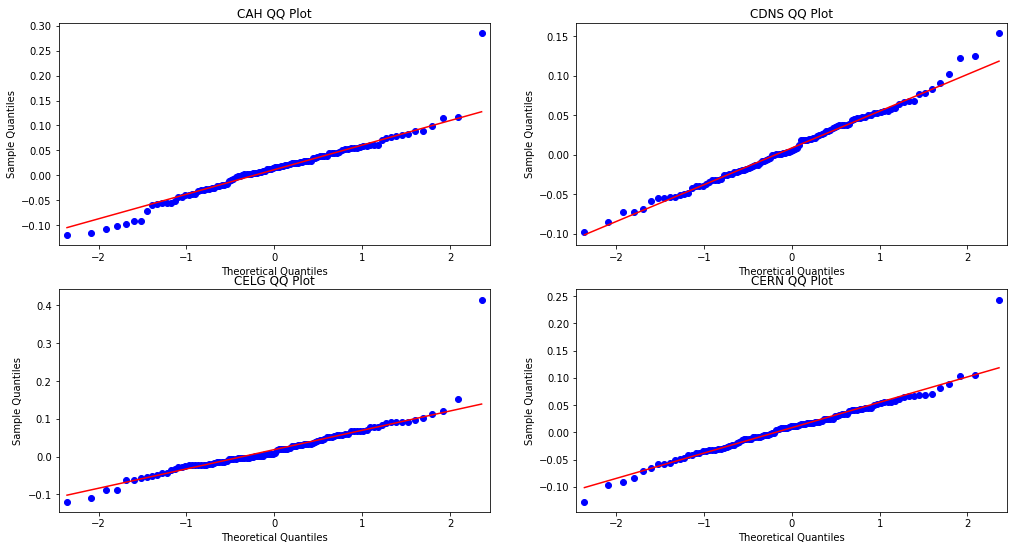

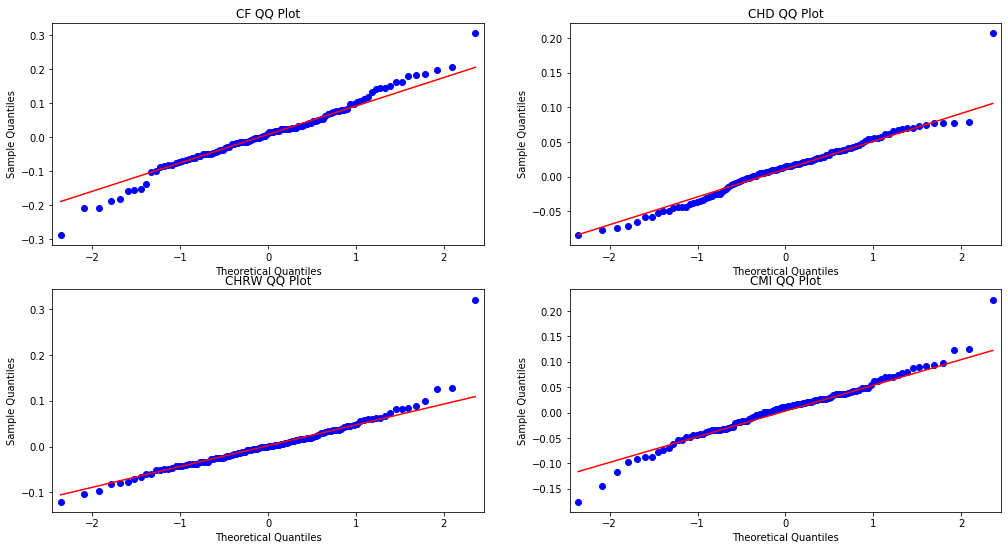

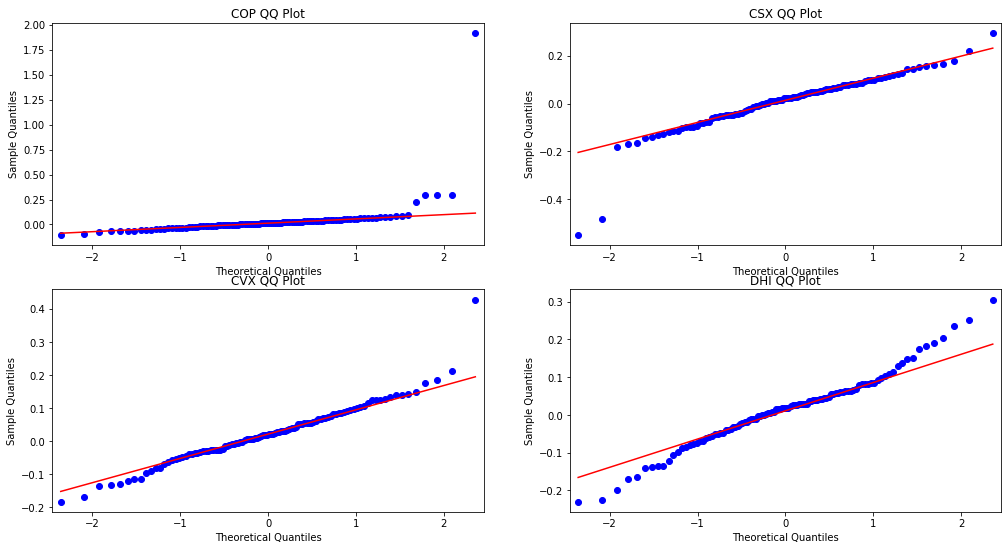

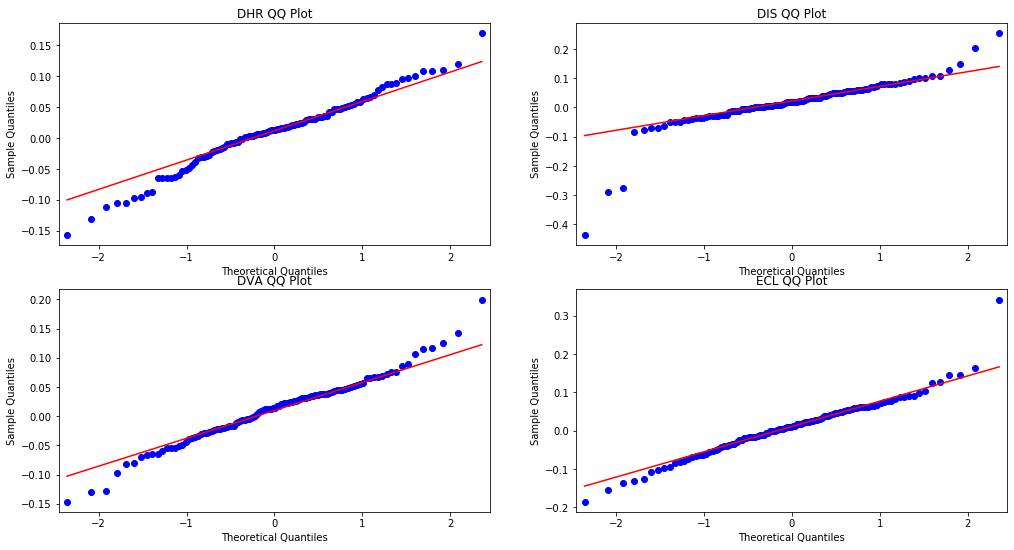

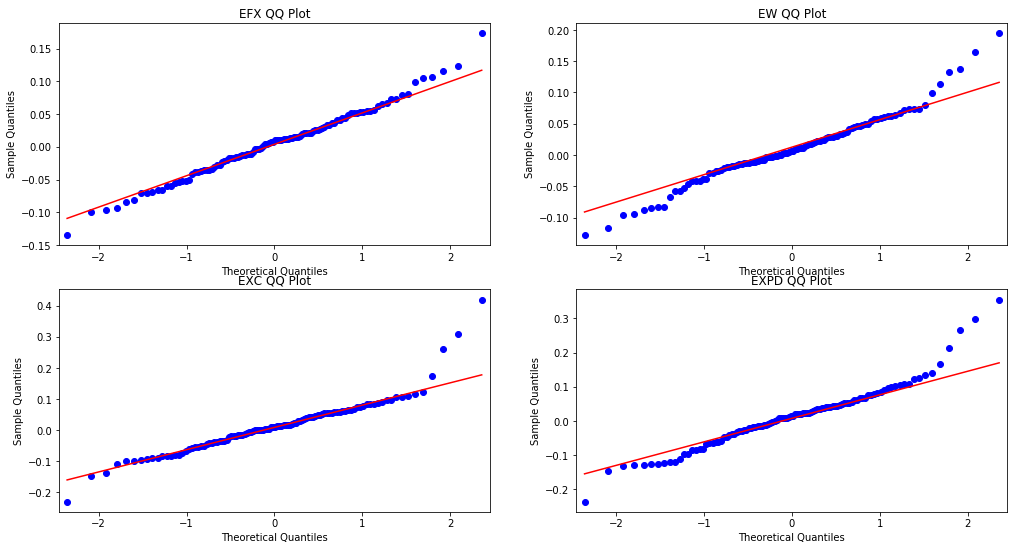

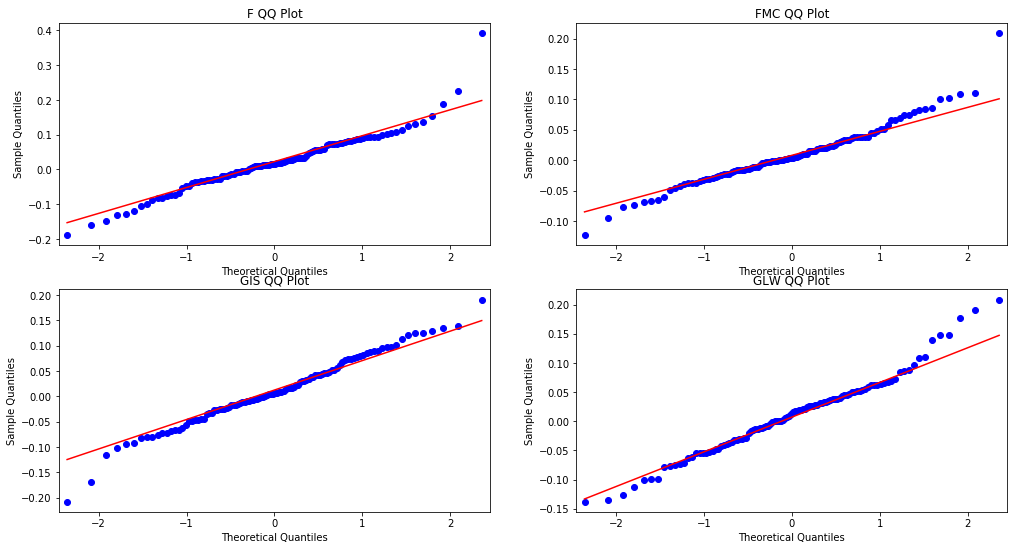

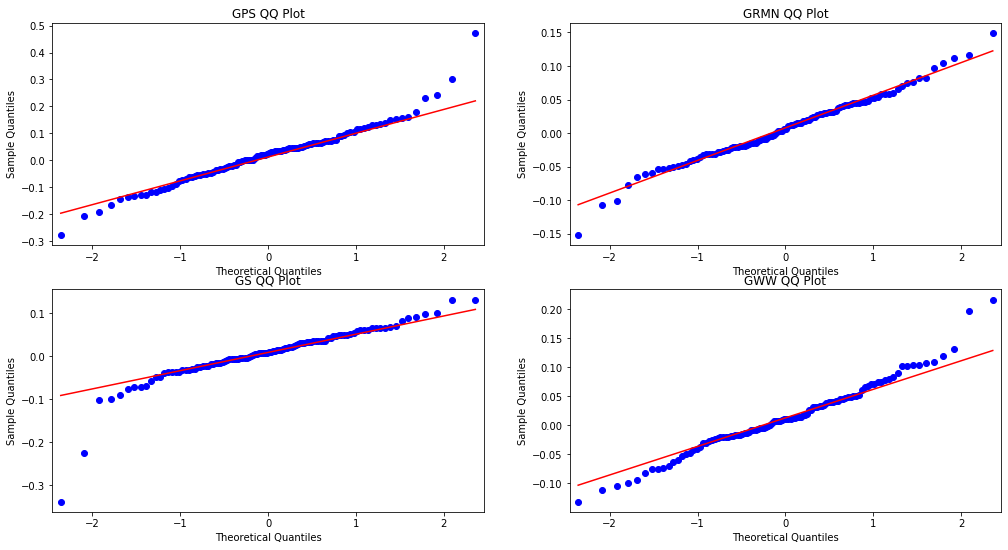

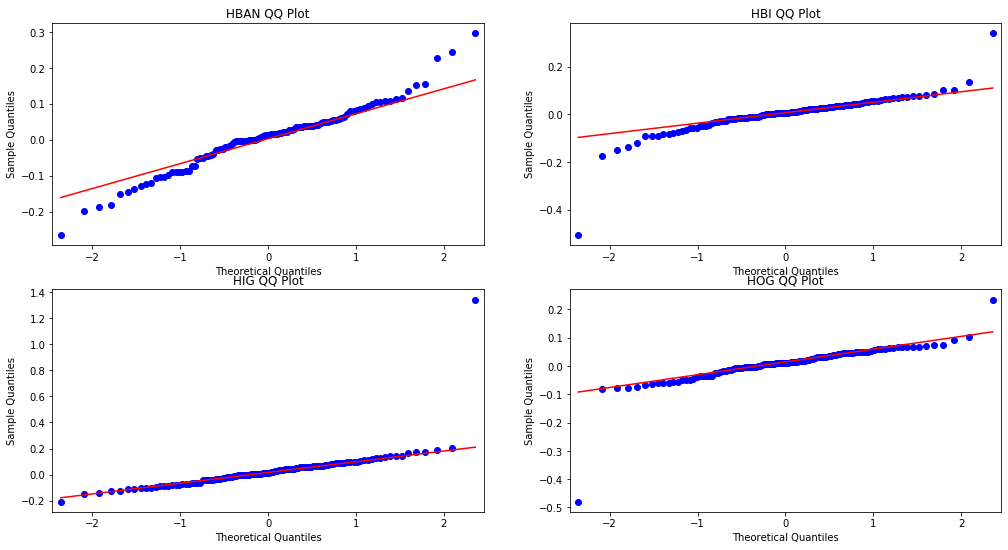

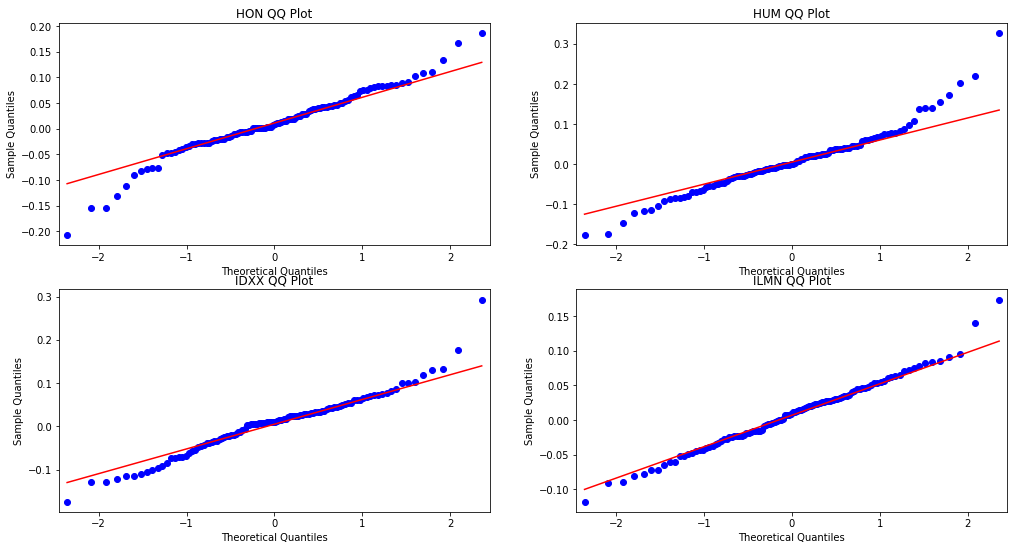

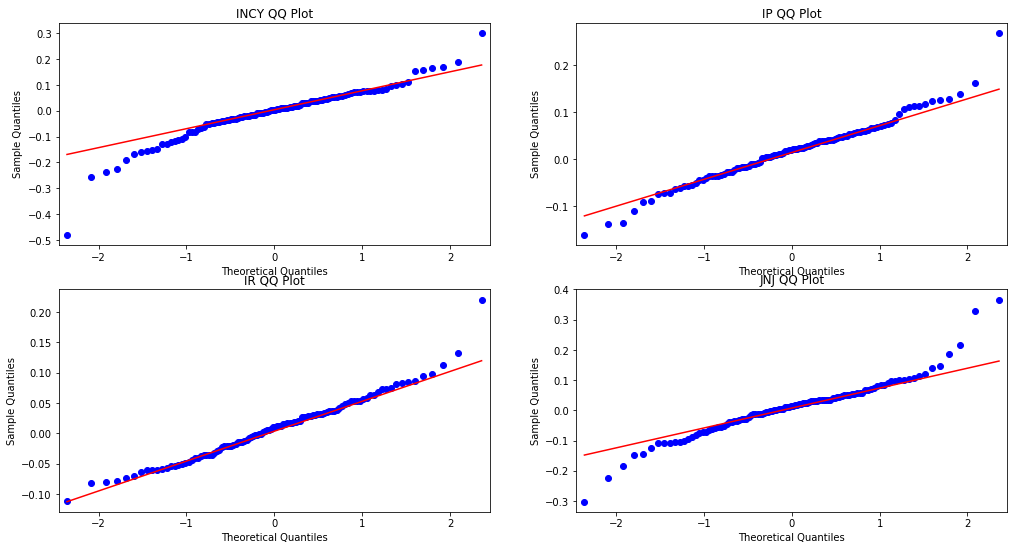

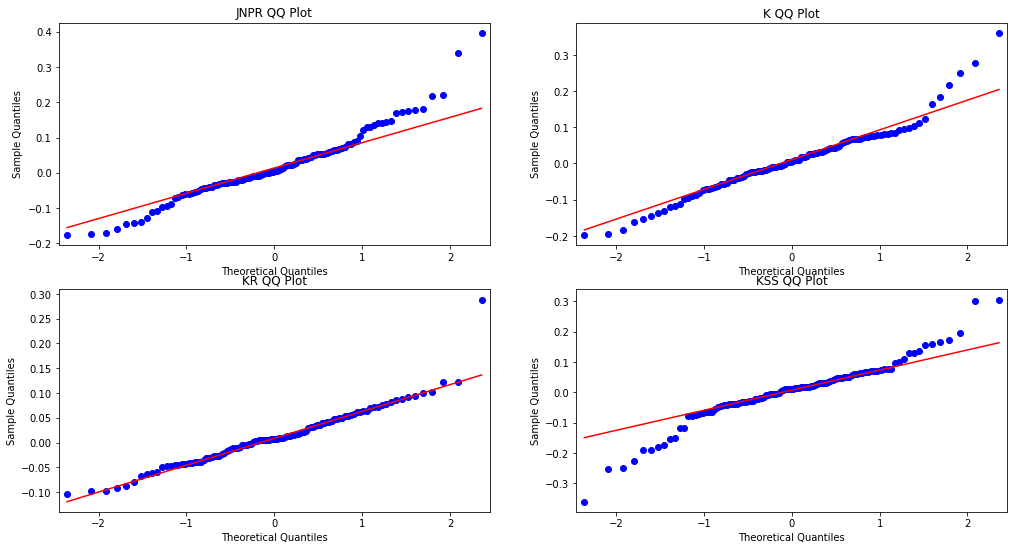

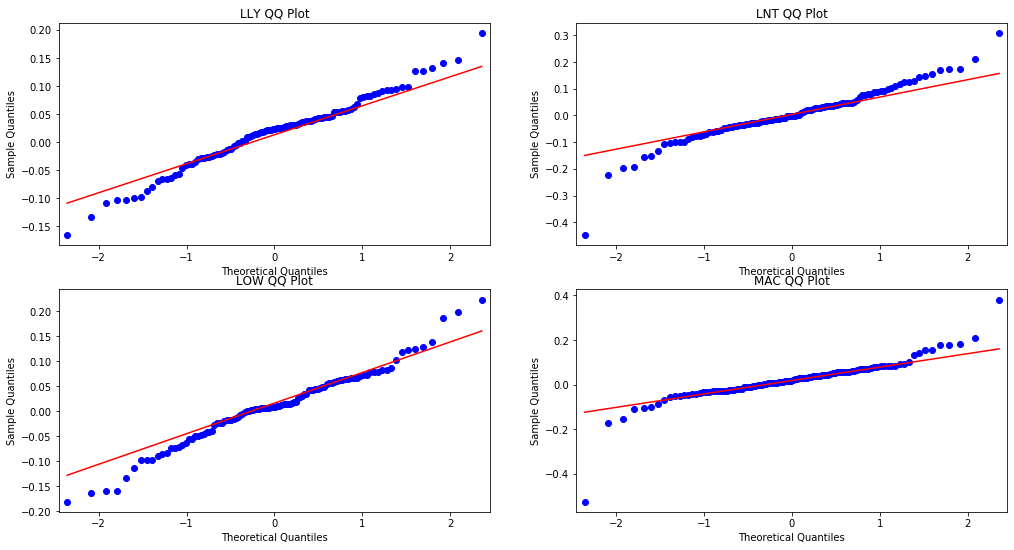

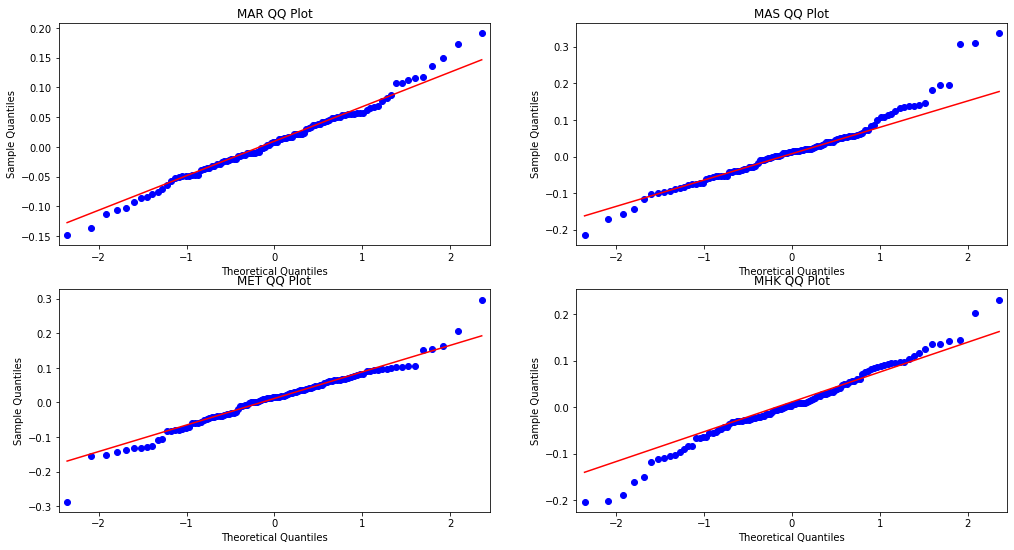

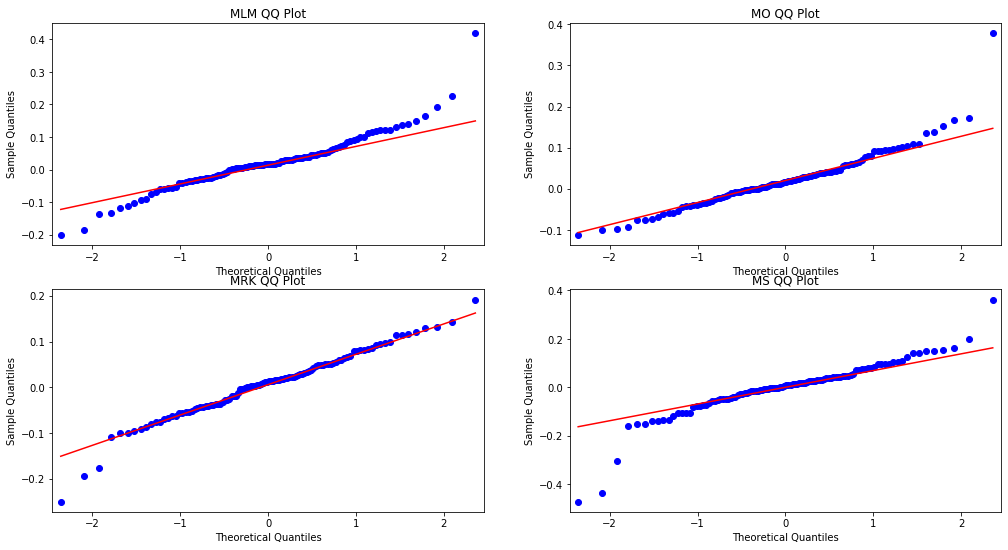

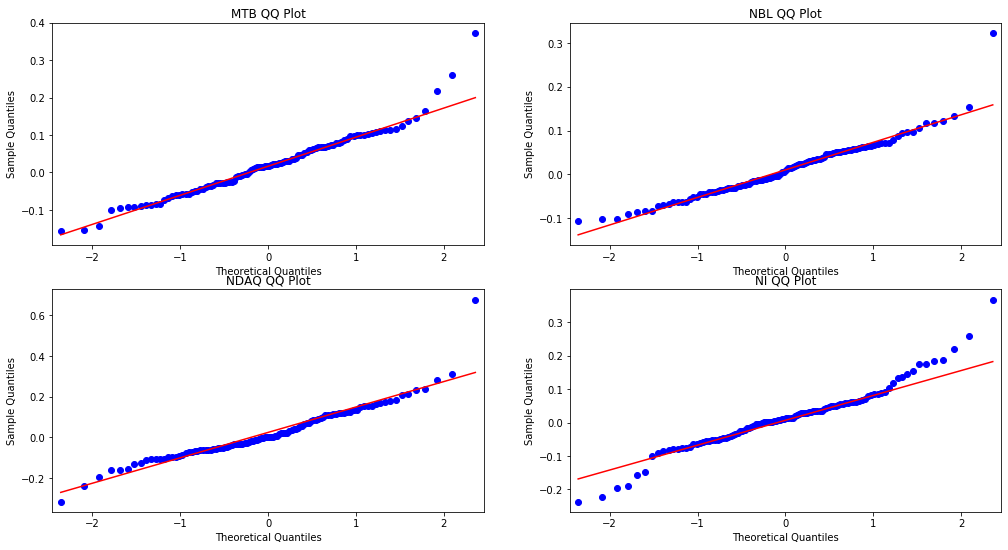

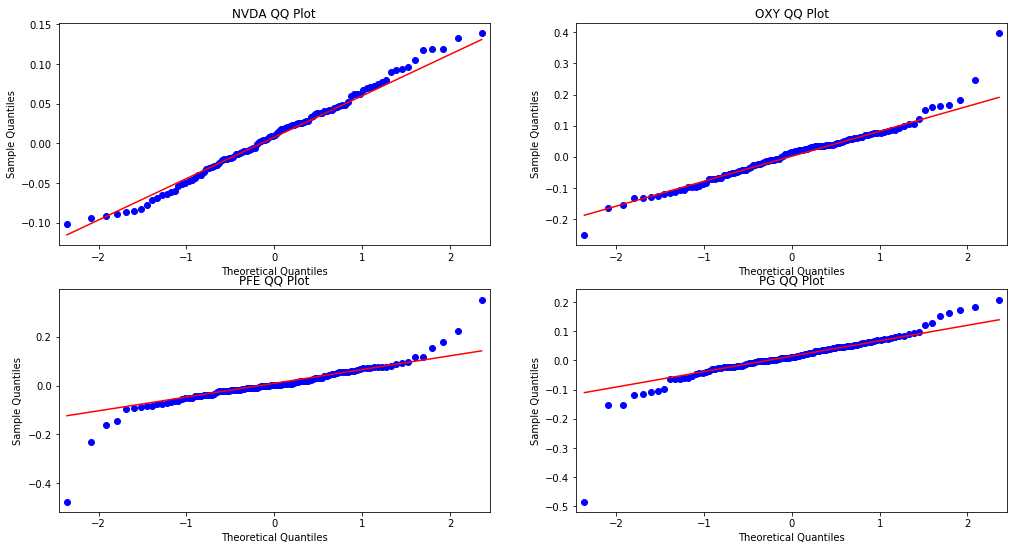

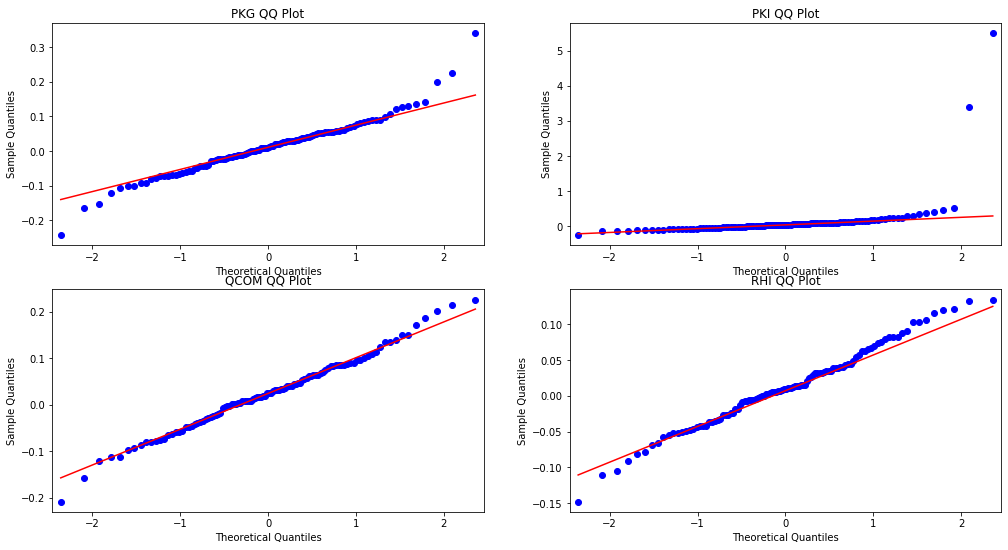

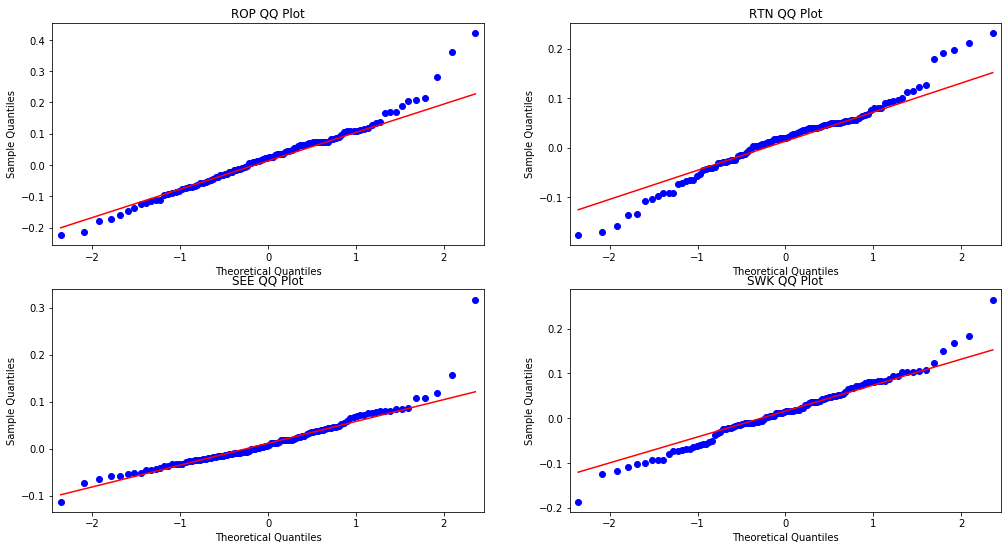

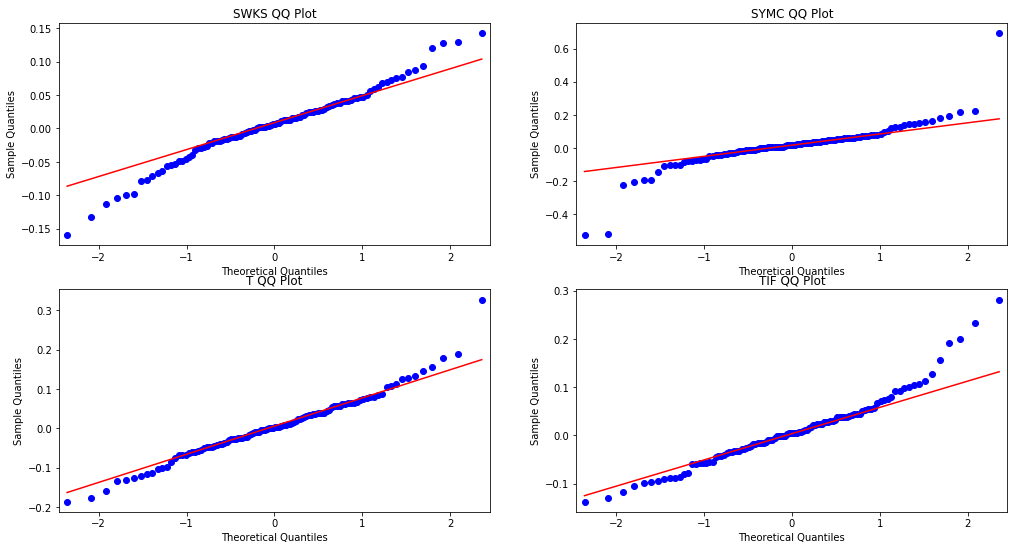

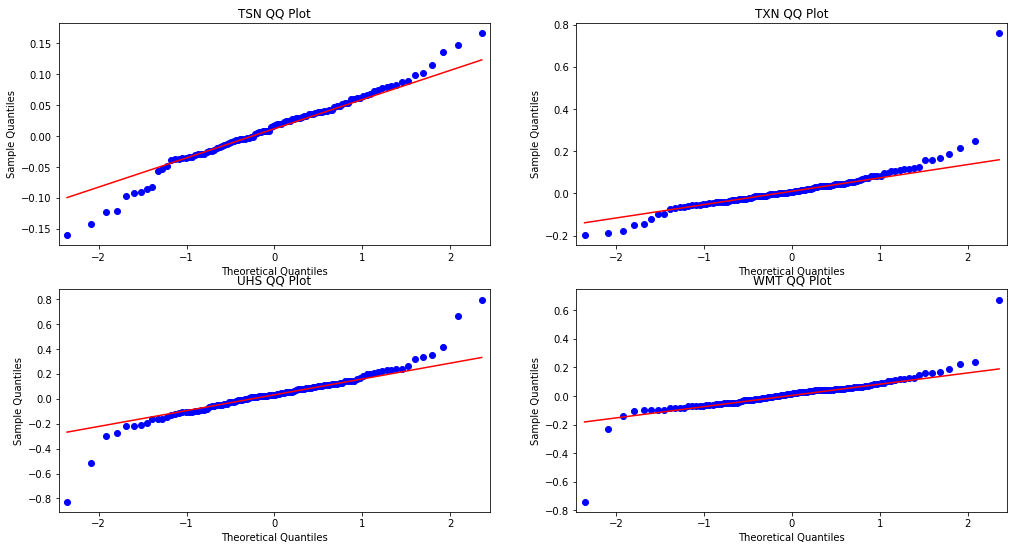

In [13]:
# ABC, 

n_stocks = len(norm_test.columns)
n_cols = 2
n_rows = 2
n_plots = n_rows*n_cols
n_loops = int(np.floor(n_stocks/n_plots))
temp_matrix = np.array(range(n_plots)).reshape(n_rows, n_cols)

for i in range(n_loops):
    lower=i*n_plots
    upper = (i+1)*n_plots
    
    temp_list = norm_test.columns[lower:upper]
    fig, ax = plt.subplots(n_rows, n_cols, figsize = (17, 9))
    
    for k in range(n_rows):
        for l in range(n_cols):
            temp_idx = temp_matrix[k,l]
            symbol = temp_list[temp_idx]
            
            sm.qqplot(data=df_returns[symbol].values, ax=ax[k,l], line='q')
            ax[k,l].set_title("{} QQ Plot".format(symbol))
            
plt.close()

In [14]:
norm_count = 0
for i in range(len(norm_test.columns)):
    shap = stats.shapiro(norm_test.iloc[:, i])
    print('{} Shapiro test: {}'.format(norm_test.columns[i], shap))
    if shap[1] < 0.001:
        norm_count += 1
print(norm_count)

ABC Shapiro test: (0.9443613290786743, 0.00020002269593533128)
ADM Shapiro test: (0.947006106376648, 0.00030005909502506256)
ADSK Shapiro test: (0.9472557306289673, 0.0003119060711469501)
AEE Shapiro test: (0.8988484144210815, 5.533632361220953e-07)
AEP Shapiro test: (0.9324019551277161, 3.536908479873091e-05)
AES Shapiro test: (0.9657325148582458, 0.0069405254907906055)
AIZ Shapiro test: (0.7691848874092102, 9.76511059513907e-12)
ALB Shapiro test: (0.9915872812271118, 0.7480514645576477)
ALXN Shapiro test: (0.9469648599624634, 0.0002981459256261587)
AMAT Shapiro test: (0.8665651082992554, 2.0244540266389777e-08)
AMGN Shapiro test: (0.9851593971252441, 0.27554839849472046)
AMP Shapiro test: (0.6058387756347656, 1.3763722115972456e-15)
APA Shapiro test: (0.8642405867576599, 1.627111068103204e-08)
AVY Shapiro test: (0.9830726981163025, 0.1869478076696396)
BLL Shapiro test: (0.9895647764205933, 0.5747329592704773)
BSX Shapiro test: (0.9906842708587646, 0.6704796552658081)
CAH Shapiro test

### one-sided z-test on proportion, alpha = 0.05

In [15]:
trials = 100
p= 0.1

proportions_ztest(norm_count, trials, p, alternative = 'smaller')

(7.606087305741639, 0.9999999999999859)

### Fail to reject null hypothesis. More than 10% of returns may be not-normal.

# Check for Heteroskedacity of Returns

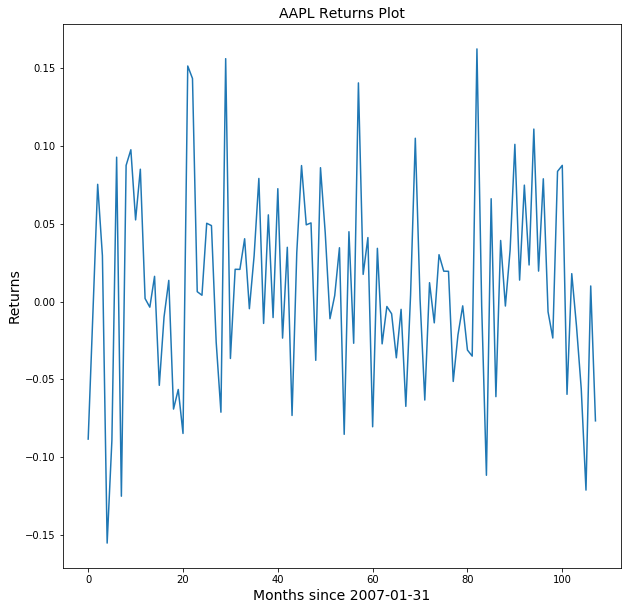

In [16]:
# sample heteroskedacity plot
fig, ax = plt.subplots(figsize=(10,10))
plt.plot(df_returns['AAPL'].values)
plt.title('AAPL Returns Plot', fontsize=14)

plt.ylabel('Returns', fontsize=14)
plt.xlabel('Months since 2007-01-31', fontsize=14)
#every_nth = 24
#for n, label in enumerate(ax.xaxis.get_ticklabels()):
#    if n % every_nth !=0:
#        label.set_visible(False)
plt.show()
plt.close()

## Hypothesis: Less than 10% of returns show Heteroskedacity

### Null: the proportion is 10% or greater

### Alternative: the proportion is less than 10%

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


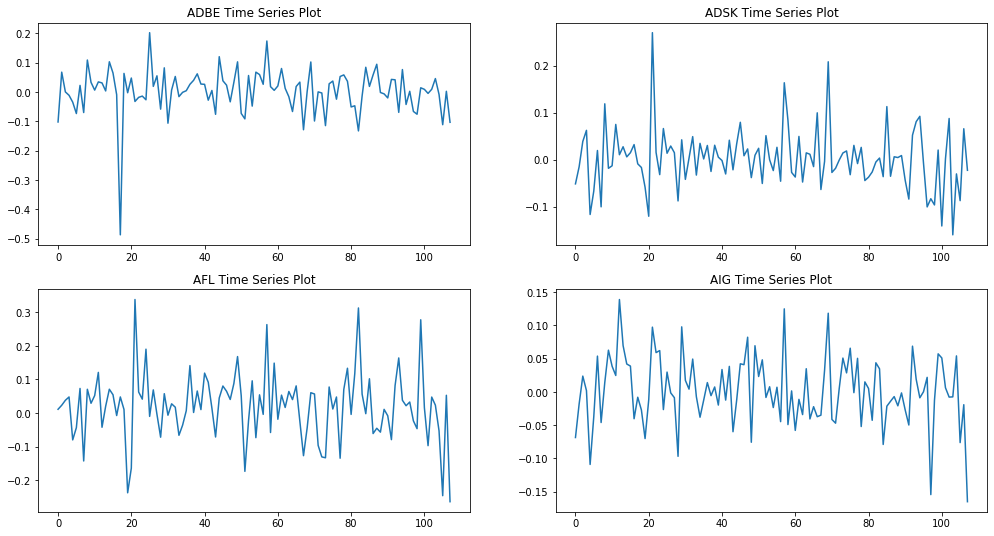

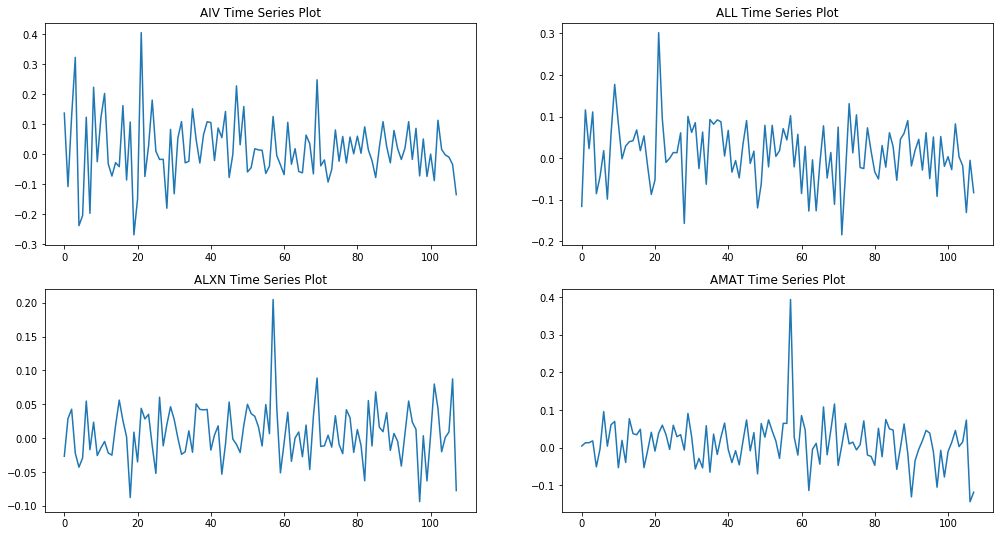

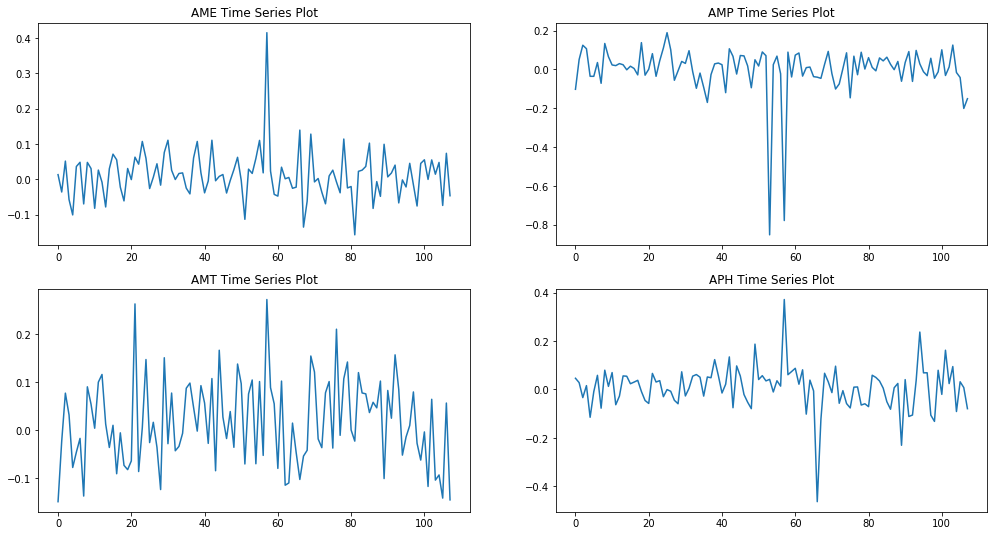

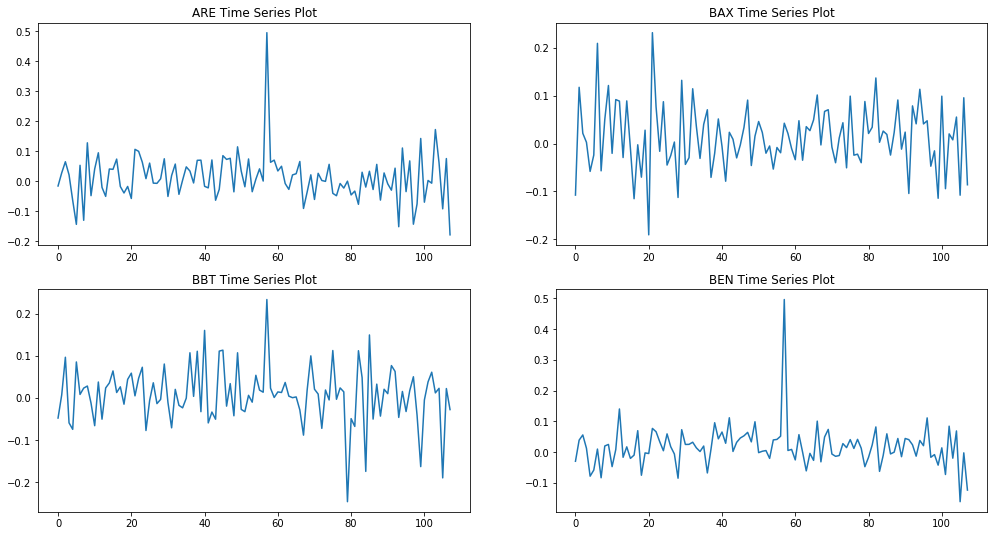

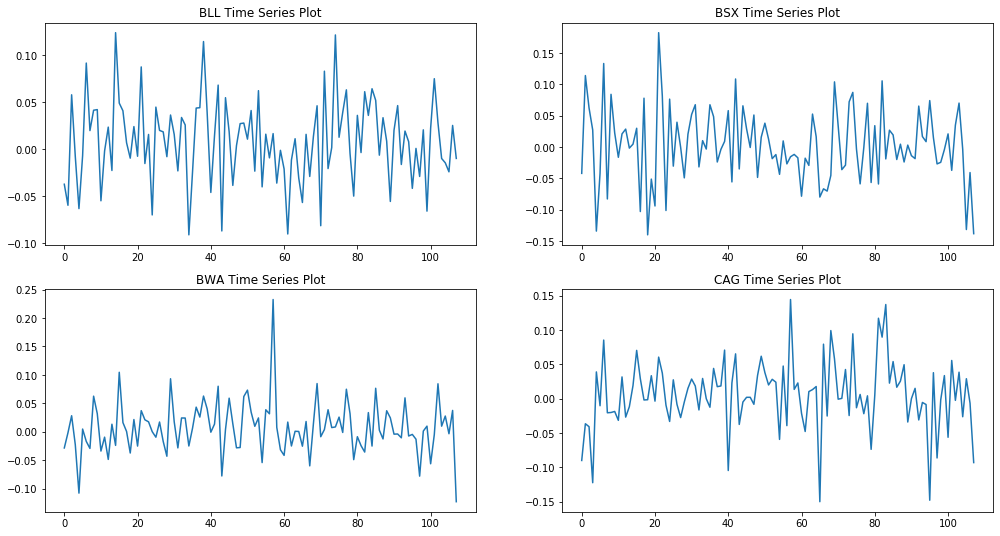

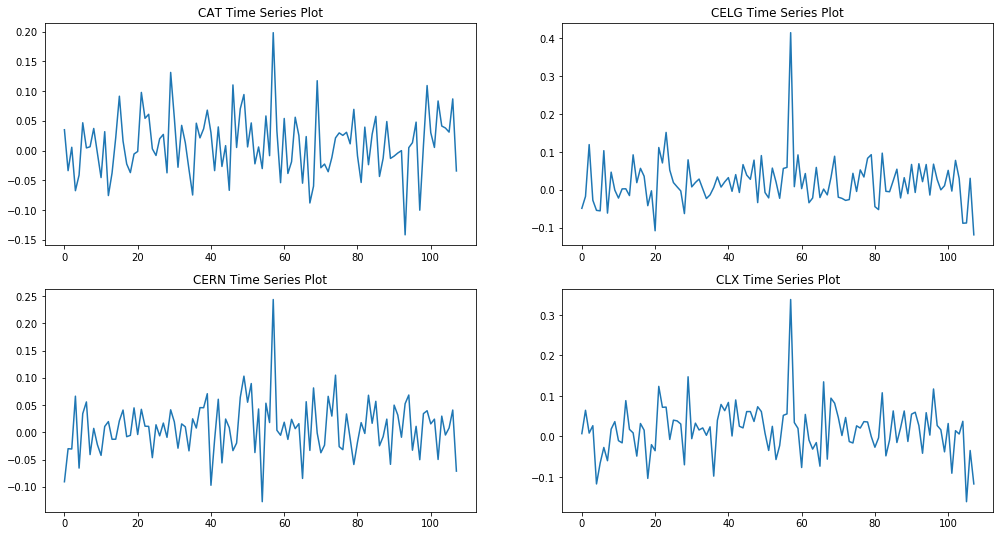

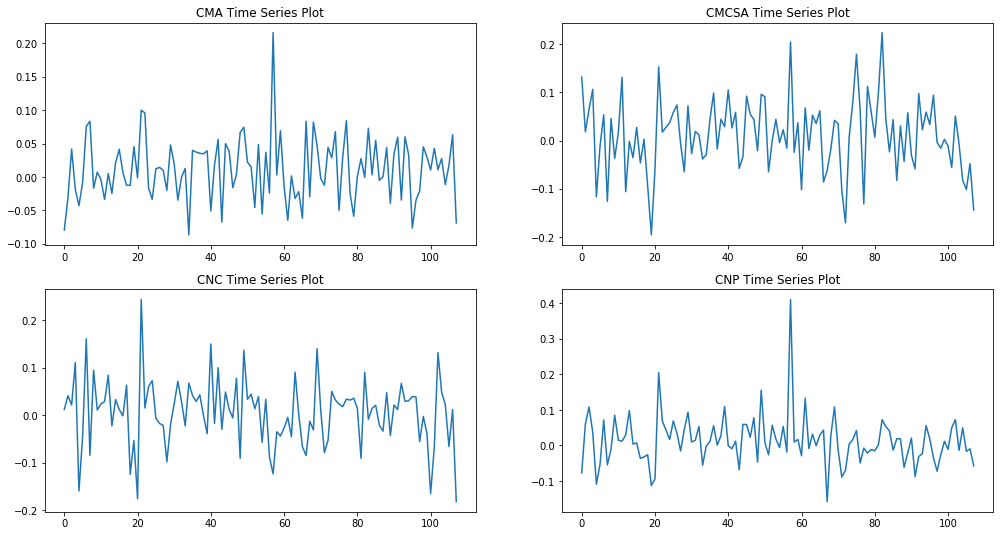

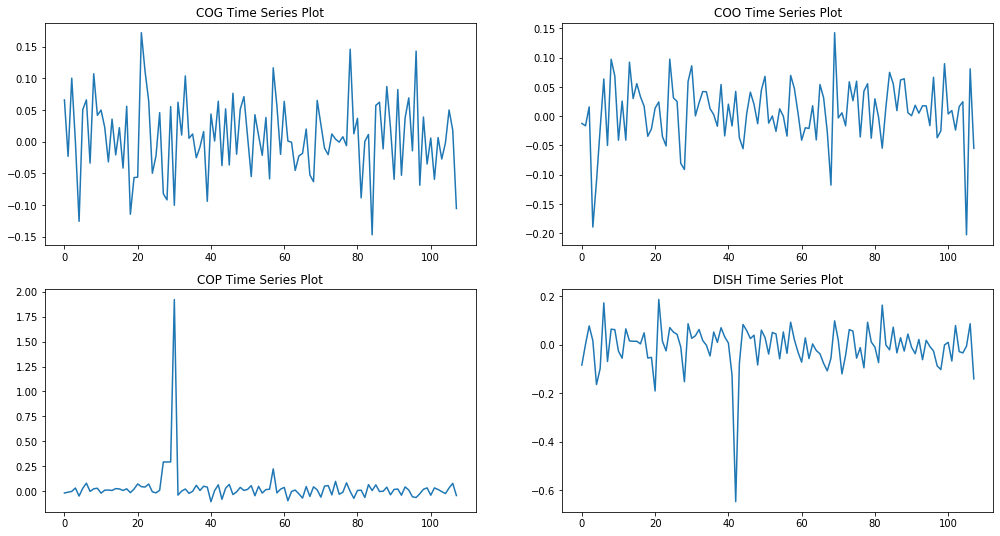

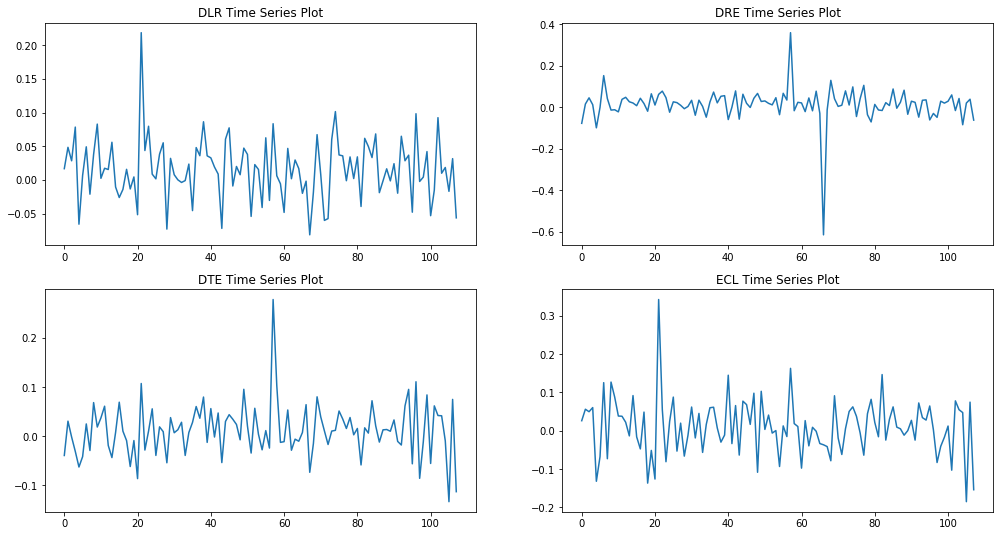

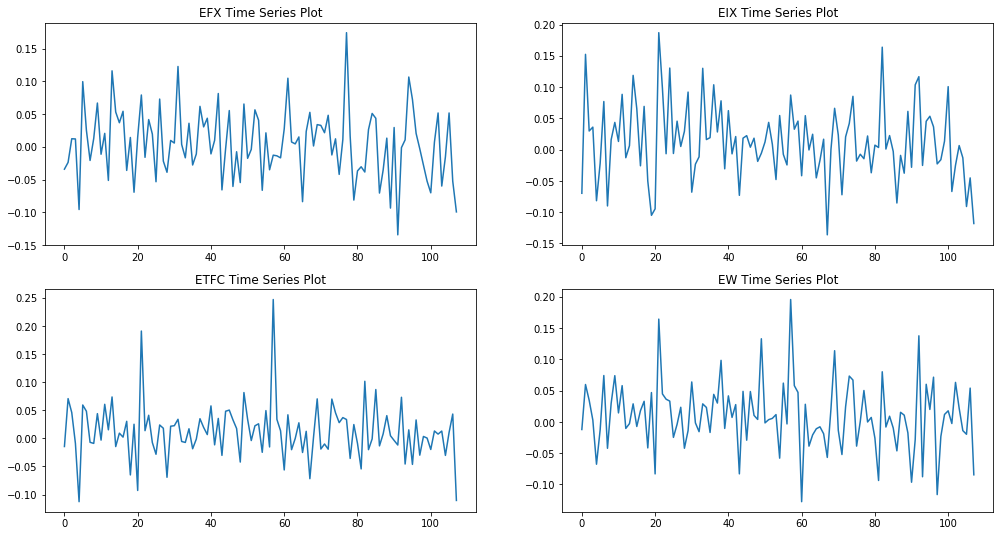

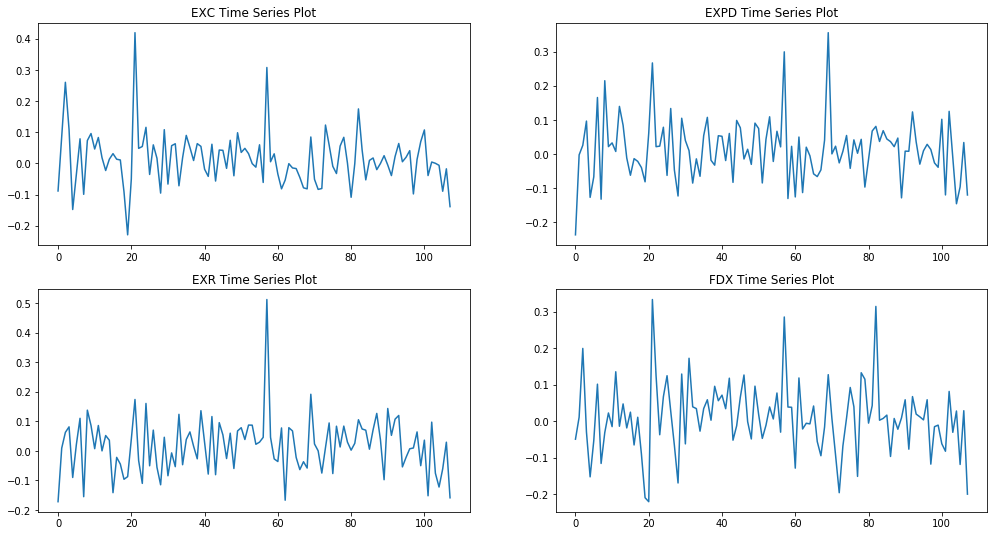

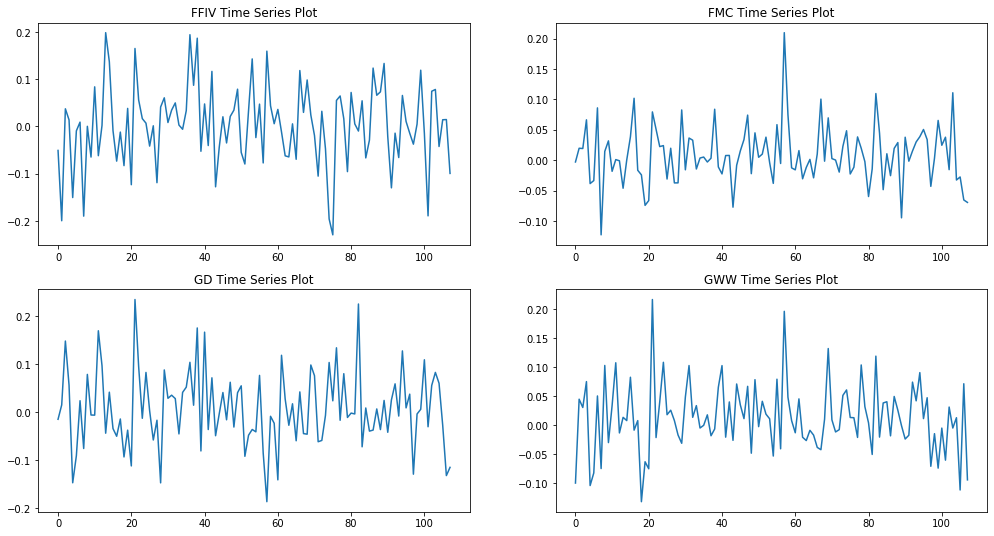

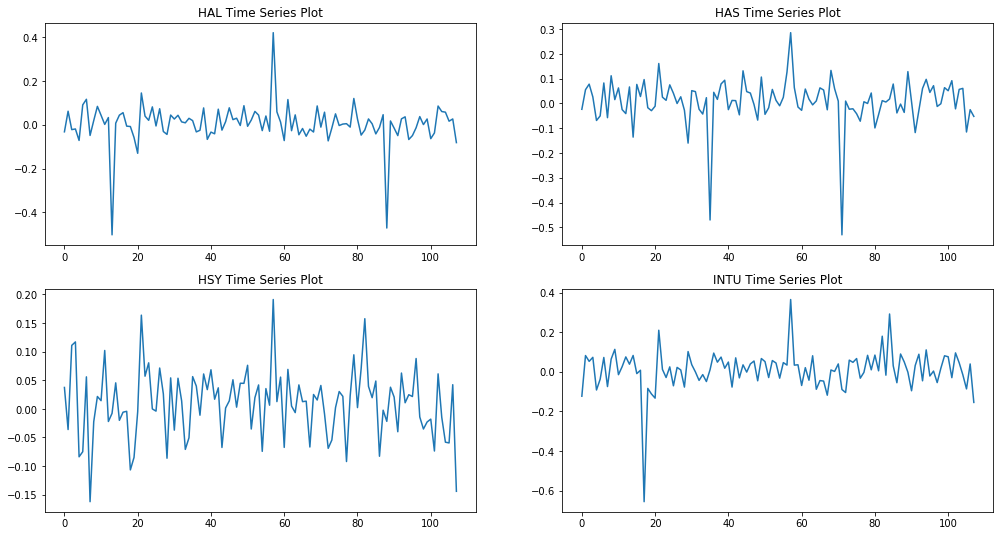

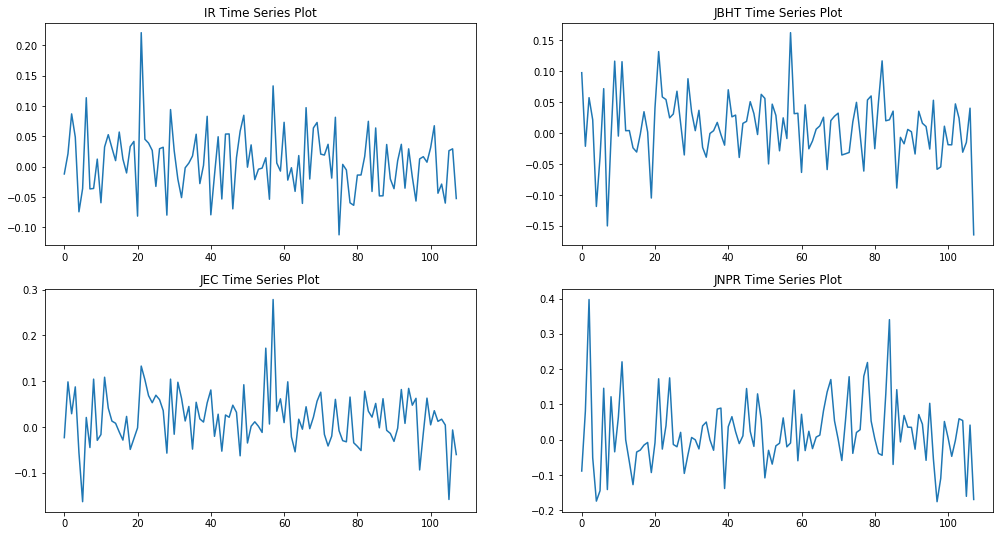

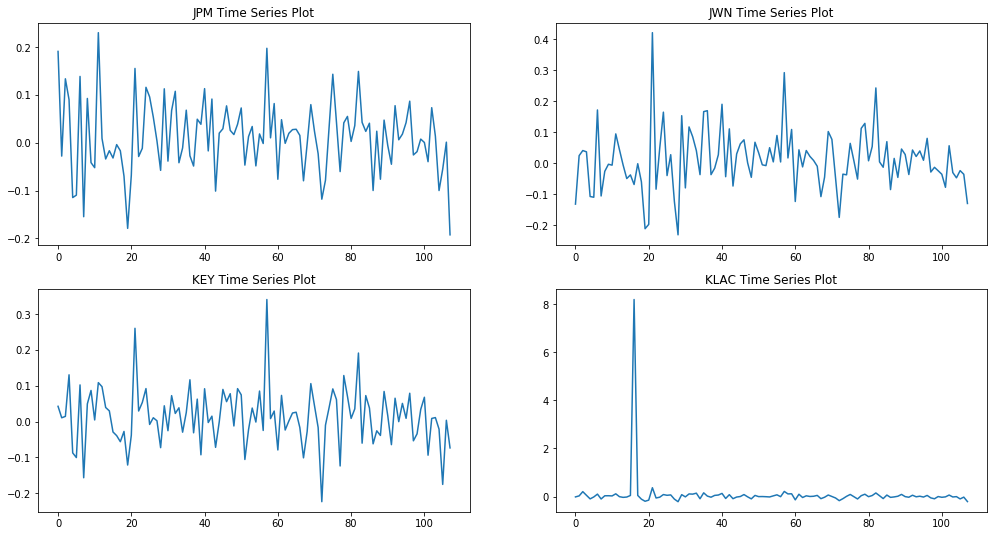

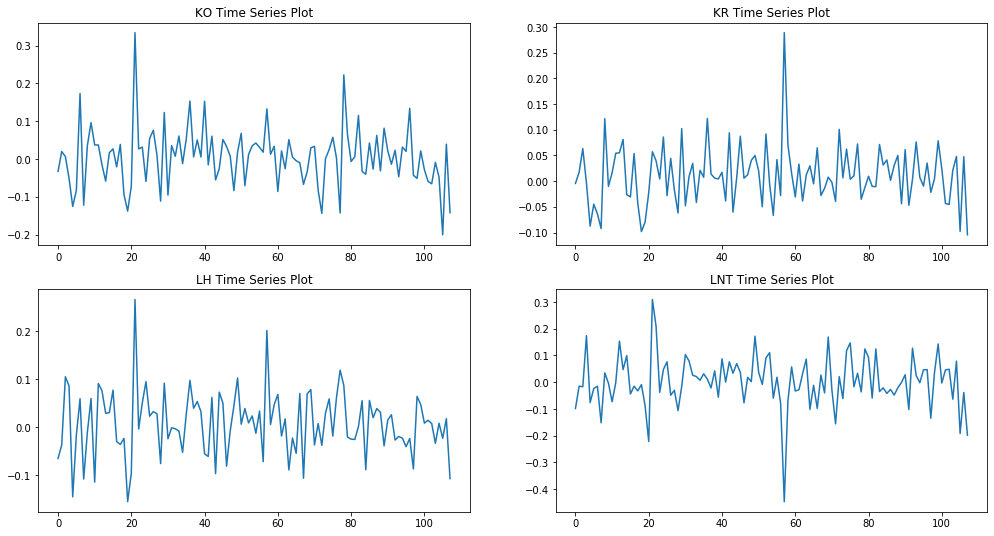

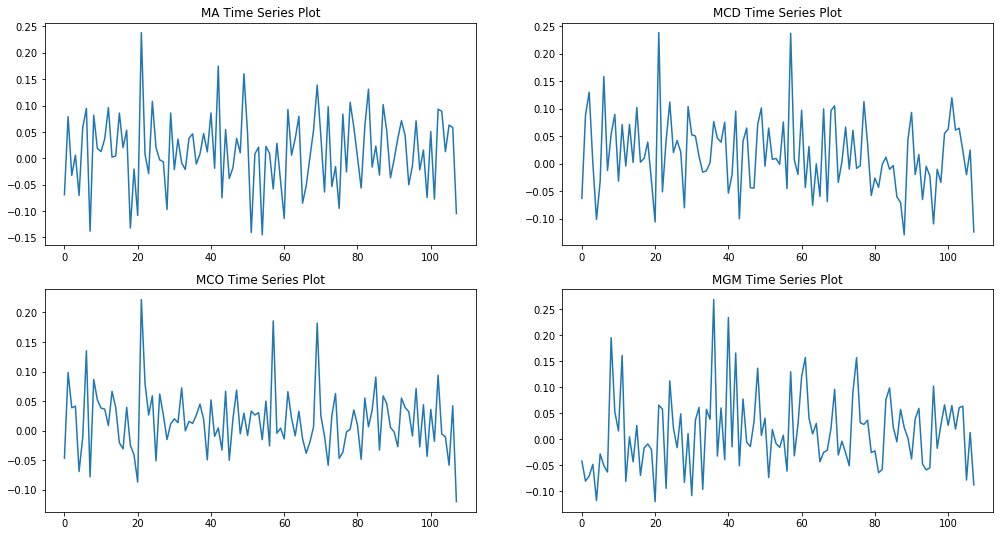

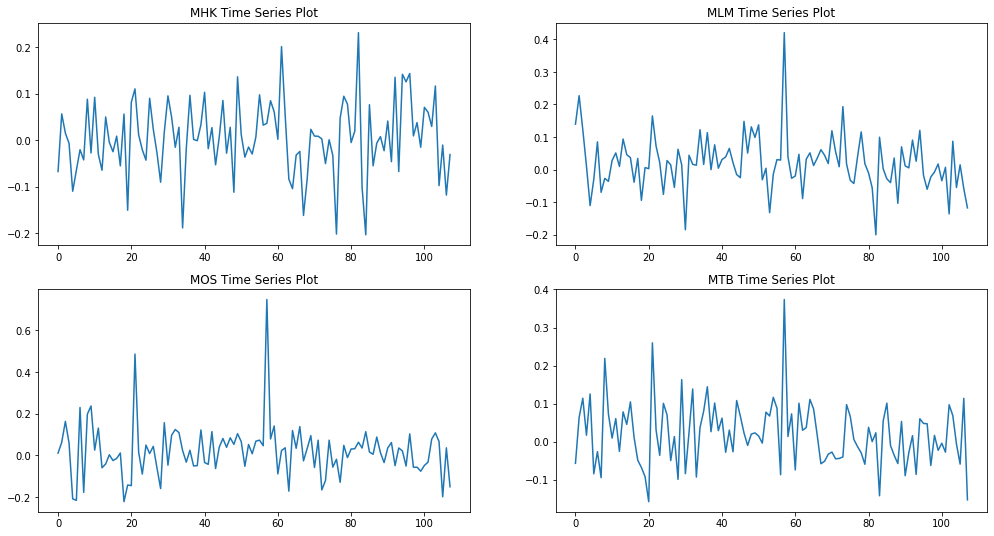

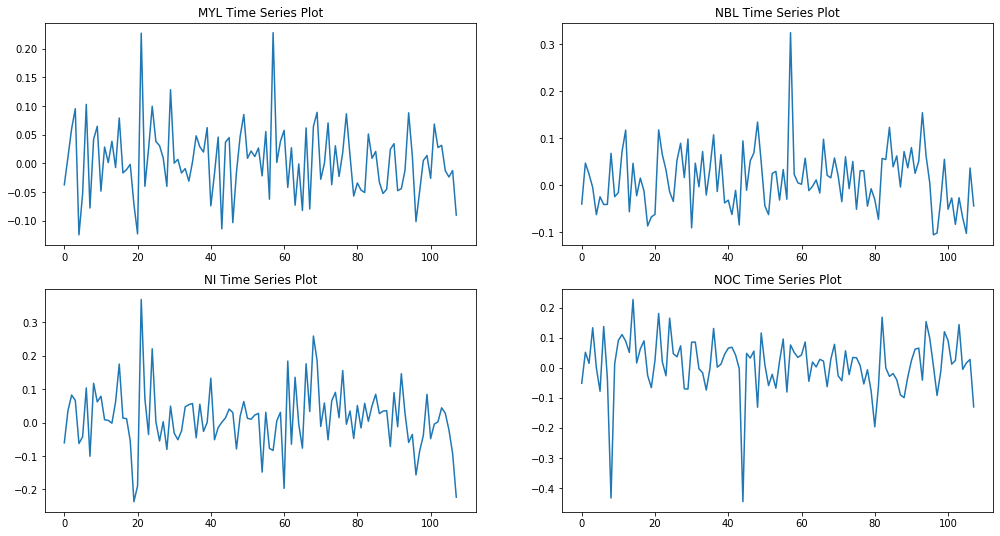

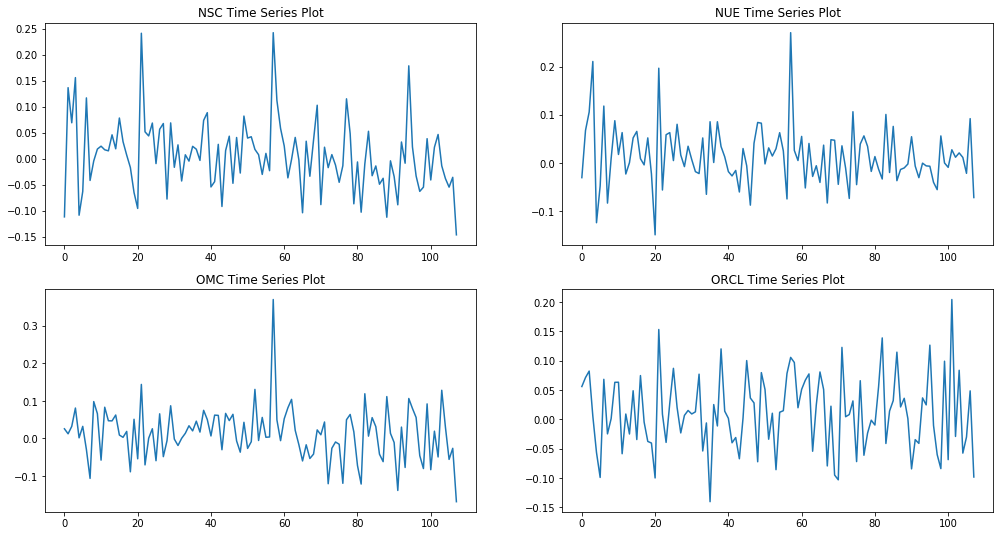

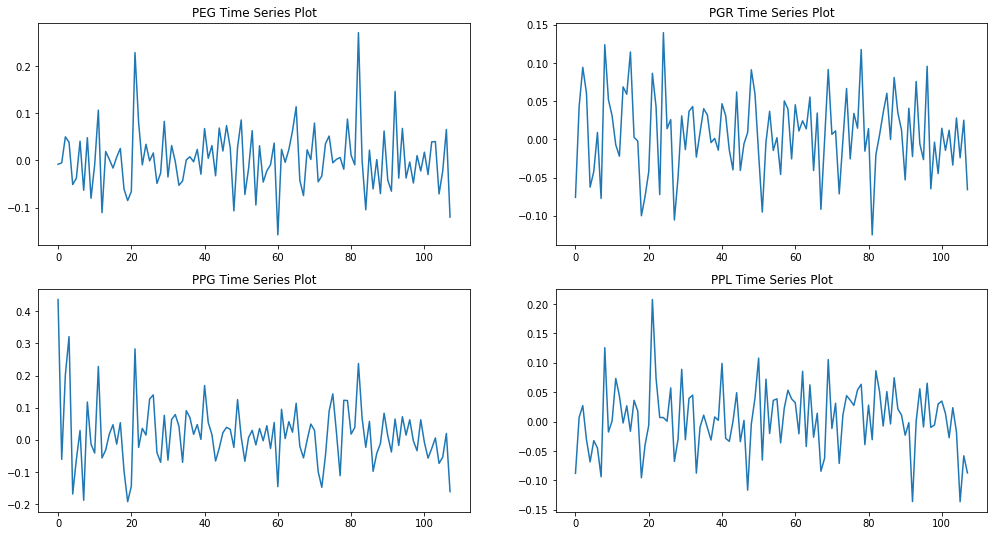

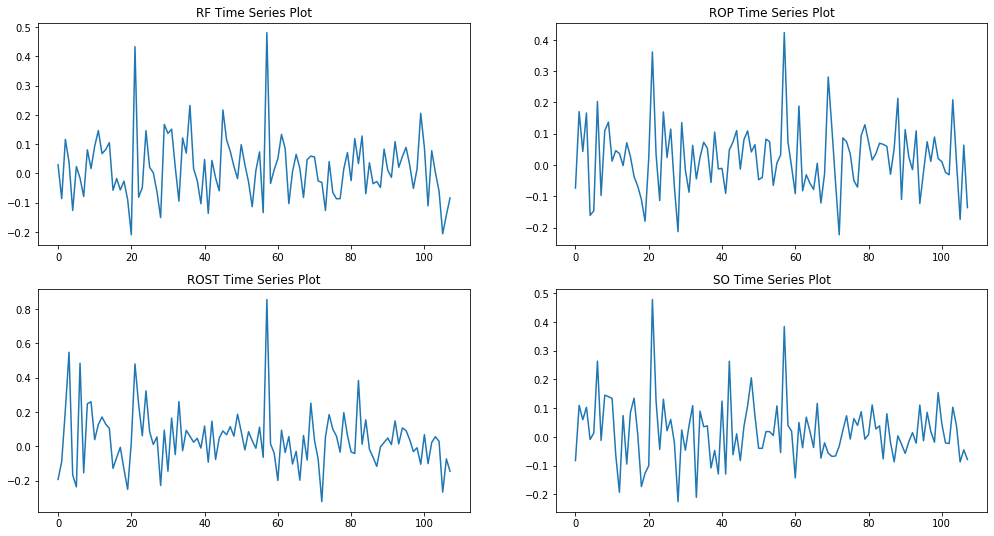

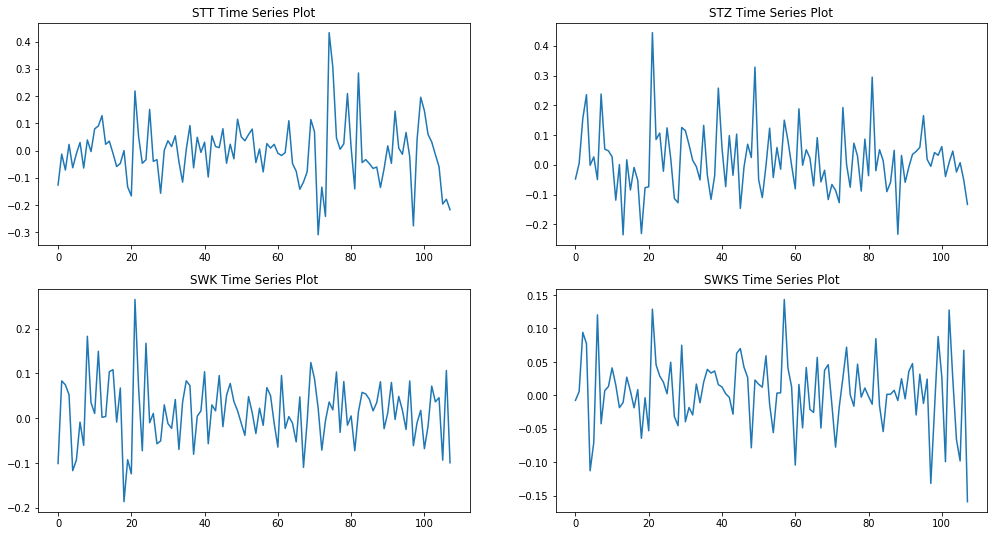

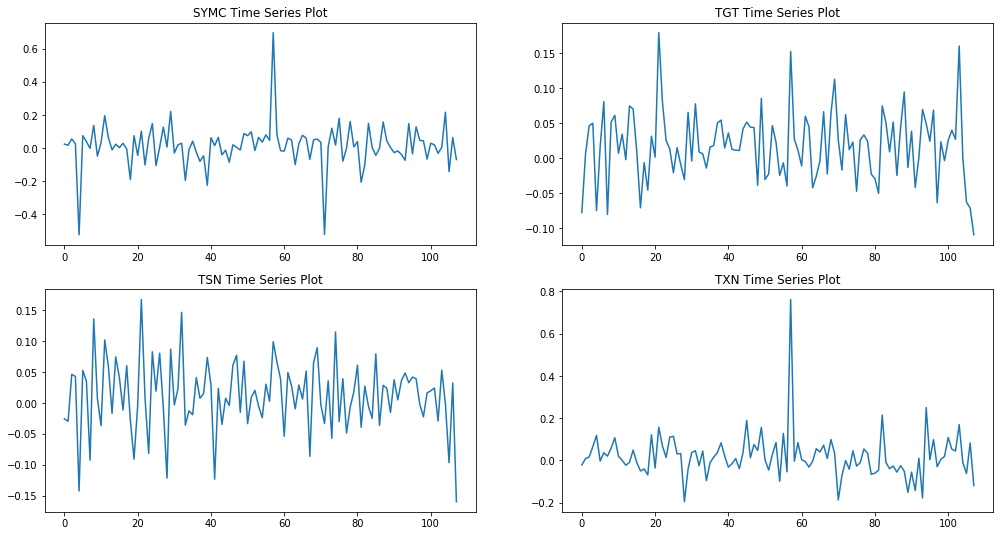

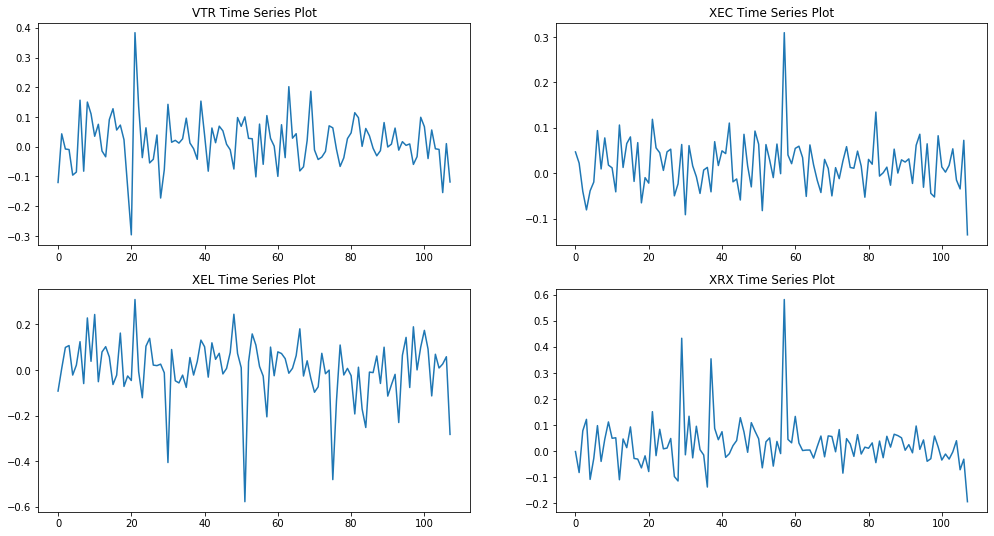

In [17]:
het_test = df_returns.sample(n=100, random_state = 3, axis=1)
het_test.sort_index(axis=1, inplace=True)

for i in range(n_loops):
    lower=i*n_plots
    upper = (i+1)*n_plots
    
    temp_list = het_test.columns[lower:upper]
    fig, ax = plt.subplots(n_rows, n_cols, figsize = (17, 9))
    

    temp_idx = temp_matrix[k,l]
    symbol = temp_list[temp_idx]
            
    for k in range(n_rows):
        for l in range(n_cols):
            temp_idx = temp_matrix[k,l]
            symbol = temp_list[temp_idx]
            
            ax[k,l].plot(df_returns[symbol].values)
            ax[k,l].set_title("{} Time Series Plot".format(symbol))

### one-sided z-test on proportion, alpha = 0.05

In [18]:
count = 3 
trials = 100
p= 0.1

proportions_ztest(count, trials, p, alternative = 'smaller')

(-4.103472672323845, 2.0349727322496014e-05)

### Reject the Null Hypothesis; the proportion of returns that demonstrate heteroskedacity are less than 10%.